# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 14308 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    0 of 14308) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 14308) |                    | Elapsed Time: 0:00:26 ETA: 11:45:27

  0% (   25 of 14308) |                     | Elapsed Time: 0:00:26 ETA: 4:15:41

  0% (   41 of 14308) |                     | Elapsed Time: 0:00:27 ETA: 2:36:56

  0% (   57 of 14308) |                     | Elapsed Time: 0:00:27 ETA: 1:53:38

  0% (   73 of 14308) |                     | Elapsed Time: 0:00:27 ETA: 0:03:05

  0% (   90 of 14308) |                     | Elapsed Time: 0:00:27 ETA: 0:03:04

  0% (  108 of 14308) |                     | Elapsed Time: 0:00:27 ETA: 0:03:00

  0% (  125 of 14308) |                     | Elapsed Time: 0:00:28 ETA: 0:02:59

  0% (  141 of 14308) |                     | Elapsed Time: 0:00:28 ETA: 0:03:02

  1% (  157 of 14308) |                     | Elapsed Time: 0:00:28 ETA: 0:03:00

  1% (  173 of 14308) |                     | Elapsed Time: 0:00:28 ETA: 0:03:04

  1% (  188 of 14308) |                     | Elapsed Time: 0:00:28 ETA: 0:03:12

  1% (  205 of 14308) |                     | Elapsed Time: 0:00:29 ETA: 0:03:12

  1% (  223 of 14308) |                     | Elapsed Time: 0:00:29 ETA: 0:03:07

  1% (  241 of 14308) |                     | Elapsed Time: 0:00:29 ETA: 0:03:01

  1% (  259 of 14308) |                     | Elapsed Time: 0:00:29 ETA: 0:02:49

  1% (  277 of 14308) |                     | Elapsed Time: 0:00:30 ETA: 0:02:45

  2% (  295 of 14308) |                     | Elapsed Time: 0:00:30 ETA: 0:02:42

  2% (  313 of 14308) |                     | Elapsed Time: 0:00:30 ETA: 0:02:42

  2% (  330 of 14308) |                     | Elapsed Time: 0:00:30 ETA: 0:02:45

  2% (  346 of 14308) |                     | Elapsed Time: 0:00:30 ETA: 0:02:50

  2% (  366 of 14308) |                     | Elapsed Time: 0:00:31 ETA: 0:02:54

  2% (  382 of 14308) |                     | Elapsed Time: 0:00:31 ETA: 0:02:58

  2% (  398 of 14308) |                     | Elapsed Time: 0:00:31 ETA: 0:02:59

  2% (  414 of 14308) |                     | Elapsed Time: 0:00:31 ETA: 0:02:59

  3% (  430 of 14308) |                     | Elapsed Time: 0:00:32 ETA: 0:02:59

  3% (  446 of 14308) |                     | Elapsed Time: 0:00:32 ETA: 0:02:59

  3% (  462 of 14308) |                     | Elapsed Time: 0:00:32 ETA: 0:03:01

  3% (  478 of 14308) |                     | Elapsed Time: 0:00:32 ETA: 0:03:00

  3% (  494 of 14308) |                     | Elapsed Time: 0:00:32 ETA: 0:03:00

  3% (  510 of 14308) |                     | Elapsed Time: 0:00:33 ETA: 0:03:00

  3% (  526 of 14308) |                     | Elapsed Time: 0:00:33 ETA: 0:02:58

  3% (  545 of 14308) |                     | Elapsed Time: 0:00:33 ETA: 0:02:57

  3% (  562 of 14308) |                     | Elapsed Time: 0:00:33 ETA: 0:02:55

  4% (  580 of 14308) |                     | Elapsed Time: 0:00:33 ETA: 0:02:51

  4% (  596 of 14308) |                     | Elapsed Time: 0:00:34 ETA: 0:02:52

  4% (  612 of 14308) |                     | Elapsed Time: 0:00:34 ETA: 0:02:55

  4% (  627 of 14308) |                     | Elapsed Time: 0:00:34 ETA: 0:02:59

  4% (  645 of 14308) |                     | Elapsed Time: 0:00:34 ETA: 0:03:00

  4% (  661 of 14308) |                     | Elapsed Time: 0:00:35 ETA: 0:03:04

  4% (  677 of 14308) |                     | Elapsed Time: 0:00:35 ETA: 0:03:02

  4% (  693 of 14308) |#                    | Elapsed Time: 0:00:35 ETA: 0:03:01

  4% (  709 of 14308) |#                    | Elapsed Time: 0:00:35 ETA: 0:03:02

  5% (  724 of 14308) |#                    | Elapsed Time: 0:00:35 ETA: 0:03:04

  5% (  740 of 14308) |#                    | Elapsed Time: 0:00:36 ETA: 0:03:04

  5% (  756 of 14308) |#                    | Elapsed Time: 0:00:36 ETA: 0:03:04

  5% (  772 of 14308) |#                    | Elapsed Time: 0:00:36 ETA: 0:03:02

  5% (  788 of 14308) |#                    | Elapsed Time: 0:00:36 ETA: 0:03:02

  5% (  804 of 14308) |#                    | Elapsed Time: 0:00:36 ETA: 0:03:01

  5% (  820 of 14308) |#                    | Elapsed Time: 0:00:37 ETA: 0:03:00

  5% (  836 of 14308) |#                    | Elapsed Time: 0:00:37 ETA: 0:03:00

  5% (  852 of 14308) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:59

  6% (  868 of 14308) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:57

  6% (  884 of 14308) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:57

  6% (  903 of 14308) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:56

  6% (  919 of 14308) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:57

  6% (  935 of 14308) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:57

  6% (  952 of 14308) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:56

  6% (  970 of 14308) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:52

  6% (  988 of 14308) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:47

  7% ( 1005 of 14308) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:46

  7% ( 1021 of 14308) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:48

  7% ( 1036 of 14308) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:53

  7% ( 1052 of 14308) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:58

  7% ( 1074 of 14308) |#                    | Elapsed Time: 0:00:40 ETA: 0:03:00

  7% ( 1090 of 14308) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:58

  7% ( 1108 of 14308) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:52

  7% ( 1120 of 14308) |#                    | Elapsed Time: 0:00:41 ETA: 0:05:10

  7% ( 1137 of 14308) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:06

  8% ( 1152 of 14308) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:17

  8% ( 1169 of 14308) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:21

  8% ( 1187 of 14308) |#                    | Elapsed Time: 0:00:42 ETA: 0:02:46

  8% ( 1205 of 14308) |#                    | Elapsed Time: 0:00:42 ETA: 0:02:42

  8% ( 1223 of 14308) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:38

  8% ( 1241 of 14308) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:33

  8% ( 1261 of 14308) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:34

  8% ( 1279 of 14308) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:35

  9% ( 1297 of 14308) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:36

  9% ( 1315 of 14308) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:35

  9% ( 1329 of 14308) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:43

  9% ( 1345 of 14308) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:48

  9% ( 1361 of 14308) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:50

  9% ( 1377 of 14308) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:54

  9% ( 1393 of 14308) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:52

  9% ( 1409 of 14308) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:46

 10% ( 1431 of 14308) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:47

 10% ( 1447 of 14308) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:47

 10% ( 1463 of 14308) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:47

 10% ( 1480 of 14308) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:46

 10% ( 1498 of 14308) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:42

 10% ( 1516 of 14308) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:35

 10% ( 1534 of 14308) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:33

 10% ( 1552 of 14308) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:31

 10% ( 1568 of 14308) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:34

 11% ( 1584 of 14308) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:39

 11% ( 1602 of 14308) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:40

 11% ( 1619 of 14308) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:41

 11% ( 1636 of 14308) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:41

 11% ( 1650 of 14308) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:45

 11% ( 1666 of 14308) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:47

 11% ( 1682 of 14308) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:48

 11% ( 1700 of 14308) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:48

 12% ( 1717 of 14308) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:42

 12% ( 1734 of 14308) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:39

 12% ( 1750 of 14308) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:38

 12% ( 1767 of 14308) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:38

 12% ( 1789 of 14308) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:41

 12% ( 1806 of 14308) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:42

 12% ( 1822 of 14308) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:42

 12% ( 1838 of 14308) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:42

 12% ( 1853 of 14308) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:44

 13% ( 1868 of 14308) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:45

 13% ( 1884 of 14308) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:52

 13% ( 1900 of 14308) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:52

 13% ( 1916 of 14308) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:52

 13% ( 1932 of 14308) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:52

 13% ( 1948 of 14308) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:51

 13% ( 1968 of 14308) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:51

 13% ( 1983 of 14308) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:50

 13% ( 1999 of 14308) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:49

 14% ( 2014 of 14308) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:48

 14% ( 2032 of 14308) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:42

 14% ( 2048 of 14308) |###                  | Elapsed Time: 0:00:53 ETA: 0:02:39

 14% ( 2063 of 14308) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:43

 14% ( 2080 of 14308) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:38

 14% ( 2096 of 14308) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:37

 14% ( 2112 of 14308) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:39

 14% ( 2128 of 14308) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:37

 15% ( 2147 of 14308) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:41

 15% ( 2163 of 14308) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:43

 15% ( 2179 of 14308) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:42

 15% ( 2196 of 14308) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:41

 15% ( 2213 of 14308) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:38

 15% ( 2231 of 14308) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:33

 15% ( 2248 of 14308) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:31

 15% ( 2265 of 14308) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:30

 15% ( 2283 of 14308) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:30

 16% ( 2301 of 14308) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:28

 16% ( 2317 of 14308) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:30

 16% ( 2334 of 14308) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:30

 16% ( 2350 of 14308) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:31

 16% ( 2367 of 14308) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:32

 16% ( 2383 of 14308) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:34

 16% ( 2400 of 14308) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:32

 16% ( 2418 of 14308) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:30

 17% ( 2436 of 14308) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:28

 17% ( 2454 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:23

 17% ( 2472 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:21

 17% ( 2489 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:25

 17% ( 2504 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:31

 17% ( 2522 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:31

 17% ( 2539 of 14308) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:33

 17% ( 2555 of 14308) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:36

 17% ( 2573 of 14308) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:29

 18% ( 2590 of 14308) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:27

 18% ( 2606 of 14308) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:28

 18% ( 2624 of 14308) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:23

 18% ( 2641 of 14308) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:24

 18% ( 2657 of 14308) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:26

 18% ( 2673 of 14308) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:28

 18% ( 2691 of 14308) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:29

 18% ( 2705 of 14308) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:35

 19% ( 2722 of 14308) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:33

 19% ( 2740 of 14308) |####                 | Elapsed Time: 0:01:02 ETA: 0:02:30

 19% ( 2756 of 14308) |####                 | Elapsed Time: 0:01:02 ETA: 0:02:28

 19% ( 2772 of 14308) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:28

 19% ( 2787 of 14308) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:29

 19% ( 2800 of 14308) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:38

 19% ( 2814 of 14308) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:46

 19% ( 2828 of 14308) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:54

 19% ( 2842 of 14308) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:58

 20% ( 2862 of 14308) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:56

 20% ( 2879 of 14308) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:45

 20% ( 2896 of 14308) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:39

 20% ( 2912 of 14308) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:35

 20% ( 2928 of 14308) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:31

 20% ( 2944 of 14308) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:28

 20% ( 2960 of 14308) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:33

 20% ( 2976 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:32

 20% ( 2994 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:29

 21% ( 3012 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:27

 21% ( 3029 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:23

 21% ( 3050 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:19

 21% ( 3067 of 14308) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:19

 21% ( 3085 of 14308) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:18

 21% ( 3103 of 14308) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:18

 21% ( 3121 of 14308) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:18

 21% ( 3138 of 14308) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:18

 22% ( 3155 of 14308) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:18

 22% ( 3173 of 14308) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:17

 22% ( 3189 of 14308) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:19

 22% ( 3205 of 14308) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:20

 22% ( 3229 of 14308) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:17

 22% ( 3247 of 14308) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:18

 22% ( 3264 of 14308) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:16

 22% ( 3282 of 14308) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:15

 23% ( 3299 of 14308) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:15

 23% ( 3317 of 14308) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:16

 23% ( 3335 of 14308) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:15

 23% ( 3351 of 14308) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:17

 23% ( 3369 of 14308) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:16

 23% ( 3387 of 14308) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:15

 23% ( 3408 of 14308) |#####                | Elapsed Time: 0:01:11 ETA: 0:02:15

 23% ( 3426 of 14308) |#####                | Elapsed Time: 0:01:11 ETA: 0:02:13

 24% ( 3444 of 14308) |#####                | Elapsed Time: 0:01:11 ETA: 0:02:12

 24% ( 3460 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:02:14

 24% ( 3478 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:02:13

 24% ( 3496 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:02:12

 24% ( 3514 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:02:11

 24% ( 3532 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:02:09

 24% ( 3550 of 14308) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:09

 24% ( 3568 of 14308) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:08

 25% ( 3586 of 14308) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:09

 25% ( 3604 of 14308) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:08

 25% ( 3622 of 14308) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:05

 25% ( 3637 of 14308) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:09

 25% ( 3653 of 14308) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:11

 25% ( 3671 of 14308) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:11

 25% ( 3689 of 14308) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:11

 25% ( 3707 of 14308) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:09

 26% ( 3723 of 14308) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:05

 26% ( 3741 of 14308) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:07

 26% ( 3765 of 14308) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:07

 26% ( 3783 of 14308) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:09

 26% ( 3801 of 14308) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:08

 26% ( 3817 of 14308) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:08

 26% ( 3833 of 14308) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:11

 26% ( 3849 of 14308) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:16

 27% ( 3865 of 14308) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:20

 27% ( 3881 of 14308) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:26

 27% ( 3897 of 14308) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:26

 27% ( 3912 of 14308) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:27

 27% ( 3935 of 14308) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:24

 27% ( 3953 of 14308) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:19

 27% ( 3970 of 14308) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:15

 27% ( 3988 of 14308) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:10

 27% ( 4006 of 14308) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:07

 28% ( 4023 of 14308) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:04

 28% ( 4041 of 14308) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:03

 28% ( 4058 of 14308) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:04

 28% ( 4076 of 14308) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:05

 28% ( 4092 of 14308) |######               | Elapsed Time: 0:01:19 ETA: 0:02:09

 28% ( 4114 of 14308) |######               | Elapsed Time: 0:01:20 ETA: 0:02:08

 28% ( 4131 of 14308) |######               | Elapsed Time: 0:01:20 ETA: 0:02:08

 28% ( 4147 of 14308) |######               | Elapsed Time: 0:01:20 ETA: 0:02:09

 29% ( 4165 of 14308) |######               | Elapsed Time: 0:01:20 ETA: 0:02:08

 29% ( 4183 of 14308) |######               | Elapsed Time: 0:01:21 ETA: 0:02:03

 29% ( 4200 of 14308) |######               | Elapsed Time: 0:01:21 ETA: 0:02:03

 29% ( 4215 of 14308) |######               | Elapsed Time: 0:01:22 ETA: 0:04:13

 29% ( 4232 of 14308) |######               | Elapsed Time: 0:01:22 ETA: 0:04:12

 29% ( 4247 of 14308) |######               | Elapsed Time: 0:01:22 ETA: 0:04:21

 29% ( 4264 of 14308) |######               | Elapsed Time: 0:01:23 ETA: 0:04:21

 29% ( 4282 of 14308) |######               | Elapsed Time: 0:01:23 ETA: 0:02:06

 30% ( 4301 of 14308) |######               | Elapsed Time: 0:01:23 ETA: 0:02:06

 30% ( 4317 of 14308) |######               | Elapsed Time: 0:01:23 ETA: 0:02:07

 30% ( 4333 of 14308) |######               | Elapsed Time: 0:01:23 ETA: 0:02:06

 30% ( 4349 of 14308) |######               | Elapsed Time: 0:01:24 ETA: 0:02:07

 30% ( 4365 of 14308) |######               | Elapsed Time: 0:01:24 ETA: 0:02:10

 30% ( 4381 of 14308) |######               | Elapsed Time: 0:01:24 ETA: 0:02:09

 30% ( 4397 of 14308) |######               | Elapsed Time: 0:01:24 ETA: 0:02:10

 30% ( 4414 of 14308) |######               | Elapsed Time: 0:01:25 ETA: 0:02:09

 30% ( 4431 of 14308) |######               | Elapsed Time: 0:01:25 ETA: 0:02:07

 31% ( 4449 of 14308) |######               | Elapsed Time: 0:01:25 ETA: 0:02:03

 31% ( 4472 of 14308) |######               | Elapsed Time: 0:01:25 ETA: 0:02:01

 31% ( 4489 of 14308) |######               | Elapsed Time: 0:01:25 ETA: 0:01:59

 31% ( 4506 of 14308) |######               | Elapsed Time: 0:01:26 ETA: 0:01:59

 31% ( 4524 of 14308) |######               | Elapsed Time: 0:01:26 ETA: 0:01:59

 31% ( 4547 of 14308) |######               | Elapsed Time: 0:01:26 ETA: 0:02:02

 31% ( 4565 of 14308) |######               | Elapsed Time: 0:01:26 ETA: 0:02:02

 32% ( 4581 of 14308) |######               | Elapsed Time: 0:01:27 ETA: 0:02:04

 32% ( 4597 of 14308) |######               | Elapsed Time: 0:01:27 ETA: 0:02:07

 32% ( 4614 of 14308) |######               | Elapsed Time: 0:01:27 ETA: 0:02:05

 32% ( 4631 of 14308) |######               | Elapsed Time: 0:01:27 ETA: 0:02:05

 32% ( 4651 of 14308) |######               | Elapsed Time: 0:01:27 ETA: 0:02:04

 32% ( 4667 of 14308) |######               | Elapsed Time: 0:01:28 ETA: 0:02:00

 32% ( 4685 of 14308) |######               | Elapsed Time: 0:01:28 ETA: 0:01:58

 32% ( 4703 of 14308) |######               | Elapsed Time: 0:01:28 ETA: 0:01:57

 32% ( 4721 of 14308) |######               | Elapsed Time: 0:01:28 ETA: 0:01:56

 33% ( 4739 of 14308) |######               | Elapsed Time: 0:01:29 ETA: 0:01:56

 33% ( 4756 of 14308) |######               | Elapsed Time: 0:01:29 ETA: 0:01:56

 33% ( 4774 of 14308) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:56

 33% ( 4792 of 14308) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:57

 33% ( 4810 of 14308) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:57

 33% ( 4829 of 14308) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:54

 33% ( 4847 of 14308) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:53

 34% ( 4865 of 14308) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:52

 34% ( 4883 of 14308) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:51

 34% ( 4901 of 14308) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:51

 34% ( 4918 of 14308) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:53

 34% ( 4935 of 14308) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:53

 34% ( 4951 of 14308) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:57

 34% ( 4967 of 14308) |#######              | Elapsed Time: 0:01:31 ETA: 0:02:00

 34% ( 4983 of 14308) |#######              | Elapsed Time: 0:01:32 ETA: 0:02:01

 34% ( 4999 of 14308) |#######              | Elapsed Time: 0:01:32 ETA: 0:02:05

 35% ( 5017 of 14308) |#######              | Elapsed Time: 0:01:32 ETA: 0:02:03

 35% ( 5035 of 14308) |#######              | Elapsed Time: 0:01:32 ETA: 0:01:59

 35% ( 5051 of 14308) |#######              | Elapsed Time: 0:01:32 ETA: 0:02:00

 35% ( 5067 of 14308) |#######              | Elapsed Time: 0:01:33 ETA: 0:01:59

 35% ( 5083 of 14308) |#######              | Elapsed Time: 0:01:33 ETA: 0:01:59

 35% ( 5099 of 14308) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:01

 35% ( 5115 of 14308) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:01

 35% ( 5131 of 14308) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:01

 35% ( 5148 of 14308) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:01

 36% ( 5166 of 14308) |#######              | Elapsed Time: 0:01:34 ETA: 0:01:57

 36% ( 5187 of 14308) |#######              | Elapsed Time: 0:01:34 ETA: 0:01:55

 36% ( 5203 of 14308) |#######              | Elapsed Time: 0:01:34 ETA: 0:01:53

 36% ( 5219 of 14308) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:51

 36% ( 5234 of 14308) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:54

 36% ( 5251 of 14308) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:55

 36% ( 5268 of 14308) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:56

 36% ( 5284 of 14308) |#######              | Elapsed Time: 0:01:35 ETA: 0:01:56

 37% ( 5300 of 14308) |#######              | Elapsed Time: 0:01:36 ETA: 0:01:54

 37% ( 5314 of 14308) |#######              | Elapsed Time: 0:01:36 ETA: 0:01:58

 37% ( 5328 of 14308) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:05

 37% ( 5342 of 14308) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:09

 37% ( 5366 of 14308) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:09

 37% ( 5384 of 14308) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:02

 37% ( 5402 of 14308) |#######              | Elapsed Time: 0:01:37 ETA: 0:01:56

 37% ( 5419 of 14308) |#######              | Elapsed Time: 0:01:37 ETA: 0:01:52

 37% ( 5435 of 14308) |#######              | Elapsed Time: 0:01:37 ETA: 0:01:50

 38% ( 5452 of 14308) |########             | Elapsed Time: 0:01:38 ETA: 0:01:50

 38% ( 5471 of 14308) |########             | Elapsed Time: 0:01:38 ETA: 0:01:49

 38% ( 5487 of 14308) |########             | Elapsed Time: 0:01:38 ETA: 0:01:51

 38% ( 5503 of 14308) |########             | Elapsed Time: 0:01:38 ETA: 0:01:50

 38% ( 5521 of 14308) |########             | Elapsed Time: 0:01:39 ETA: 0:01:48

 38% ( 5545 of 14308) |########             | Elapsed Time: 0:01:39 ETA: 0:01:47

 38% ( 5563 of 14308) |########             | Elapsed Time: 0:01:39 ETA: 0:01:46

 39% ( 5581 of 14308) |########             | Elapsed Time: 0:01:39 ETA: 0:01:44

 39% ( 5599 of 14308) |########             | Elapsed Time: 0:01:39 ETA: 0:01:44

 39% ( 5617 of 14308) |########             | Elapsed Time: 0:01:40 ETA: 0:01:45

 39% ( 5634 of 14308) |########             | Elapsed Time: 0:01:40 ETA: 0:01:46

 39% ( 5650 of 14308) |########             | Elapsed Time: 0:01:40 ETA: 0:01:49

 39% ( 5666 of 14308) |########             | Elapsed Time: 0:01:40 ETA: 0:01:50

 39% ( 5682 of 14308) |########             | Elapsed Time: 0:01:41 ETA: 0:01:51

 39% ( 5699 of 14308) |########             | Elapsed Time: 0:01:41 ETA: 0:01:52

 39% ( 5716 of 14308) |########             | Elapsed Time: 0:01:41 ETA: 0:01:49

 40% ( 5733 of 14308) |########             | Elapsed Time: 0:01:41 ETA: 0:01:49

 40% ( 5750 of 14308) |########             | Elapsed Time: 0:01:41 ETA: 0:01:49

 40% ( 5768 of 14308) |########             | Elapsed Time: 0:01:42 ETA: 0:01:47

 40% ( 5786 of 14308) |########             | Elapsed Time: 0:01:42 ETA: 0:01:45

 40% ( 5803 of 14308) |########             | Elapsed Time: 0:01:42 ETA: 0:01:43

 40% ( 5819 of 14308) |########             | Elapsed Time: 0:01:42 ETA: 0:01:44

 40% ( 5836 of 14308) |########             | Elapsed Time: 0:01:42 ETA: 0:01:44

 40% ( 5854 of 14308) |########             | Elapsed Time: 0:01:43 ETA: 0:01:43

 41% ( 5872 of 14308) |########             | Elapsed Time: 0:01:43 ETA: 0:01:42

 41% ( 5890 of 14308) |########             | Elapsed Time: 0:01:43 ETA: 0:01:41

 41% ( 5911 of 14308) |########             | Elapsed Time: 0:01:43 ETA: 0:01:41

 41% ( 5928 of 14308) |########             | Elapsed Time: 0:01:44 ETA: 0:01:42

 41% ( 5944 of 14308) |########             | Elapsed Time: 0:01:44 ETA: 0:01:44

 41% ( 5962 of 14308) |########             | Elapsed Time: 0:01:44 ETA: 0:01:44

 41% ( 5977 of 14308) |########             | Elapsed Time: 0:01:44 ETA: 0:01:46

 41% ( 5994 of 14308) |########             | Elapsed Time: 0:01:44 ETA: 0:01:46

 41% ( 6009 of 14308) |########             | Elapsed Time: 0:01:45 ETA: 0:01:48

 42% ( 6025 of 14308) |########             | Elapsed Time: 0:01:45 ETA: 0:01:49

 42% ( 6043 of 14308) |########             | Elapsed Time: 0:01:45 ETA: 0:01:47

 42% ( 6061 of 14308) |########             | Elapsed Time: 0:01:45 ETA: 0:01:43

 42% ( 6081 of 14308) |########             | Elapsed Time: 0:01:46 ETA: 0:01:41

 42% ( 6098 of 14308) |########             | Elapsed Time: 0:01:46 ETA: 0:01:38

 42% ( 6116 of 14308) |########             | Elapsed Time: 0:01:46 ETA: 0:01:38

 42% ( 6133 of 14308) |#########            | Elapsed Time: 0:01:46 ETA: 0:01:40

 42% ( 6151 of 14308) |#########            | Elapsed Time: 0:01:46 ETA: 0:01:40

 43% ( 6169 of 14308) |#########            | Elapsed Time: 0:01:47 ETA: 0:01:38

 43% ( 6184 of 14308) |#########            | Elapsed Time: 0:01:47 ETA: 0:01:41

 43% ( 6201 of 14308) |#########            | Elapsed Time: 0:01:47 ETA: 0:01:40

 43% ( 6219 of 14308) |#########            | Elapsed Time: 0:01:47 ETA: 0:01:38

 43% ( 6237 of 14308) |#########            | Elapsed Time: 0:01:47 ETA: 0:01:39

 43% ( 6260 of 14308) |#########            | Elapsed Time: 0:01:48 ETA: 0:01:37

 43% ( 6276 of 14308) |#########            | Elapsed Time: 0:01:48 ETA: 0:01:35

 43% ( 6293 of 14308) |#########            | Elapsed Time: 0:01:48 ETA: 0:01:37

 44% ( 6310 of 14308) |#########            | Elapsed Time: 0:01:48 ETA: 0:01:38

 44% ( 6328 of 14308) |#########            | Elapsed Time: 0:01:49 ETA: 0:01:38

 44% ( 6345 of 14308) |#########            | Elapsed Time: 0:01:49 ETA: 0:01:38

 44% ( 6363 of 14308) |#########            | Elapsed Time: 0:01:49 ETA: 0:01:37

 44% ( 6381 of 14308) |#########            | Elapsed Time: 0:01:49 ETA: 0:01:36

 44% ( 6398 of 14308) |#########            | Elapsed Time: 0:01:49 ETA: 0:01:37

 44% ( 6414 of 14308) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:38

 44% ( 6432 of 14308) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:37

 45% ( 6448 of 14308) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:37

 45% ( 6465 of 14308) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:38

 45% ( 6481 of 14308) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:38

 45% ( 6497 of 14308) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:38

 45% ( 6513 of 14308) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:41

 45% ( 6530 of 14308) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:41

 45% ( 6548 of 14308) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:39

 45% ( 6565 of 14308) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:37

 46% ( 6583 of 14308) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:35

 46% ( 6600 of 14308) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:33

 46% ( 6618 of 14308) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:38

 46% ( 6634 of 14308) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:39

 46% ( 6650 of 14308) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:41

 46% ( 6667 of 14308) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:41

 46% ( 6685 of 14308) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:36

 46% ( 6700 of 14308) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:38

 46% ( 6716 of 14308) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:36

 47% ( 6734 of 14308) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:35

 47% ( 6752 of 14308) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:34

 47% ( 6768 of 14308) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:34

 47% ( 6784 of 14308) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:36

 47% ( 6805 of 14308) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:36

 47% ( 6821 of 14308) |##########           | Elapsed Time: 0:01:55 ETA: 0:01:37

 47% ( 6838 of 14308) |##########           | Elapsed Time: 0:01:55 ETA: 0:01:38

 47% ( 6855 of 14308) |##########           | Elapsed Time: 0:01:55 ETA: 0:01:35

 48% ( 6873 of 14308) |##########           | Elapsed Time: 0:01:55 ETA: 0:01:33

 48% ( 6891 of 14308) |##########           | Elapsed Time: 0:01:56 ETA: 0:01:31

 48% ( 6909 of 14308) |##########           | Elapsed Time: 0:01:56 ETA: 0:01:28

 48% ( 6925 of 14308) |##########           | Elapsed Time: 0:01:56 ETA: 0:01:28

 48% ( 6941 of 14308) |##########           | Elapsed Time: 0:01:56 ETA: 0:01:31

 48% ( 6957 of 14308) |##########           | Elapsed Time: 0:01:57 ETA: 0:01:33

 48% ( 6976 of 14308) |##########           | Elapsed Time: 0:01:57 ETA: 0:01:34

 48% ( 6993 of 14308) |##########           | Elapsed Time: 0:01:57 ETA: 0:01:35

 48% ( 7010 of 14308) |##########           | Elapsed Time: 0:01:57 ETA: 0:01:32

 49% ( 7026 of 14308) |##########           | Elapsed Time: 0:01:57 ETA: 0:01:32

 49% ( 7042 of 14308) |##########           | Elapsed Time: 0:01:58 ETA: 0:01:31

 49% ( 7060 of 14308) |##########           | Elapsed Time: 0:01:58 ETA: 0:01:32

 49% ( 7077 of 14308) |##########           | Elapsed Time: 0:01:58 ETA: 0:01:31

 49% ( 7093 of 14308) |##########           | Elapsed Time: 0:01:58 ETA: 0:01:32

 49% ( 7111 of 14308) |##########           | Elapsed Time: 0:01:58 ETA: 0:01:29

 49% ( 7128 of 14308) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:29

 49% ( 7144 of 14308) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:32

 50% ( 7163 of 14308) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:28

 50% ( 7180 of 14308) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:28

 50% ( 7196 of 14308) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:31

 50% ( 7211 of 14308) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:31

 50% ( 7229 of 14308) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:29

 50% ( 7245 of 14308) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:32

 50% ( 7259 of 14308) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:35

 50% ( 7272 of 14308) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:39

 50% ( 7285 of 14308) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:44

 51% ( 7300 of 14308) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:48

 51% ( 7317 of 14308) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:43

 51% ( 7342 of 14308) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:34

 51% ( 7359 of 14308) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:30

 51% ( 7377 of 14308) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:24

 51% ( 7395 of 14308) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:22

 51% ( 7412 of 14308) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:22

 51% ( 7430 of 14308) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:21

 52% ( 7445 of 14308) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:24

 52% ( 7462 of 14308) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:26

 52% ( 7480 of 14308) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:24

 52% ( 7496 of 14308) |###########          | Elapsed Time: 0:02:03 ETA: 0:01:25

 52% ( 7520 of 14308) |###########          | Elapsed Time: 0:02:04 ETA: 0:01:24

 52% ( 7538 of 14308) |###########          | Elapsed Time: 0:02:04 ETA: 0:01:23

 52% ( 7556 of 14308) |###########          | Elapsed Time: 0:02:04 ETA: 0:01:21

 52% ( 7573 of 14308) |###########          | Elapsed Time: 0:02:04 ETA: 0:01:22

 53% ( 7591 of 14308) |###########          | Elapsed Time: 0:02:05 ETA: 0:01:20

 53% ( 7609 of 14308) |###########          | Elapsed Time: 0:02:05 ETA: 0:01:20

 53% ( 7627 of 14308) |###########          | Elapsed Time: 0:02:05 ETA: 0:01:19

 53% ( 7643 of 14308) |###########          | Elapsed Time: 0:02:05 ETA: 0:01:21

 53% ( 7659 of 14308) |###########          | Elapsed Time: 0:02:05 ETA: 0:01:22

 53% ( 7676 of 14308) |###########          | Elapsed Time: 0:02:06 ETA: 0:01:22

 53% ( 7698 of 14308) |###########          | Elapsed Time: 0:02:06 ETA: 0:01:24

 53% ( 7716 of 14308) |###########          | Elapsed Time: 0:02:06 ETA: 0:01:23

 54% ( 7733 of 14308) |###########          | Elapsed Time: 0:02:06 ETA: 0:01:21

 54% ( 7749 of 14308) |###########          | Elapsed Time: 0:02:07 ETA: 0:01:22

 54% ( 7767 of 14308) |###########          | Elapsed Time: 0:02:07 ETA: 0:01:21

 54% ( 7784 of 14308) |###########          | Elapsed Time: 0:02:07 ETA: 0:01:20

 54% ( 7800 of 14308) |###########          | Elapsed Time: 0:02:07 ETA: 0:01:23

 54% ( 7816 of 14308) |###########          | Elapsed Time: 0:02:07 ETA: 0:01:22

 54% ( 7833 of 14308) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:23

 54% ( 7851 of 14308) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:21

 55% ( 7870 of 14308) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:21

 55% ( 7886 of 14308) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:21

 55% ( 7904 of 14308) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:19

 55% ( 7922 of 14308) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:19

 55% ( 7940 of 14308) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:19

 55% ( 7958 of 14308) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:18

 55% ( 7974 of 14308) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:17

 55% ( 7989 of 14308) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:20

 55% ( 8005 of 14308) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:21

 56% ( 8022 of 14308) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:21

 56% ( 8030 of 14308) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:23

 56% ( 8049 of 14308) |###########          | Elapsed Time: 0:02:12 ETA: 0:03:12

 56% ( 8065 of 14308) |###########          | Elapsed Time: 0:02:12 ETA: 0:03:04

 56% ( 8081 of 14308) |###########          | Elapsed Time: 0:02:12 ETA: 0:03:05

 56% ( 8097 of 14308) |###########          | Elapsed Time: 0:02:12 ETA: 0:03:06

 56% ( 8112 of 14308) |###########          | Elapsed Time: 0:02:12 ETA: 0:01:25

 56% ( 8128 of 14308) |###########          | Elapsed Time: 0:02:13 ETA: 0:01:23

 56% ( 8143 of 14308) |###########          | Elapsed Time: 0:02:13 ETA: 0:01:24

 57% ( 8160 of 14308) |###########          | Elapsed Time: 0:02:13 ETA: 0:01:23

 57% ( 8176 of 14308) |############         | Elapsed Time: 0:02:13 ETA: 0:01:22

 57% ( 8193 of 14308) |############         | Elapsed Time: 0:02:14 ETA: 0:01:20

 57% ( 8210 of 14308) |############         | Elapsed Time: 0:02:14 ETA: 0:01:17

 57% ( 8228 of 14308) |############         | Elapsed Time: 0:02:14 ETA: 0:01:15

 57% ( 8246 of 14308) |############         | Elapsed Time: 0:02:14 ETA: 0:01:14

 57% ( 8263 of 14308) |############         | Elapsed Time: 0:02:14 ETA: 0:01:14

 57% ( 8280 of 14308) |############         | Elapsed Time: 0:02:15 ETA: 0:01:13

 57% ( 8297 of 14308) |############         | Elapsed Time: 0:02:15 ETA: 0:01:14

 58% ( 8315 of 14308) |############         | Elapsed Time: 0:02:15 ETA: 0:01:13

 58% ( 8332 of 14308) |############         | Elapsed Time: 0:02:15 ETA: 0:01:13

 58% ( 8349 of 14308) |############         | Elapsed Time: 0:02:15 ETA: 0:01:12

 58% ( 8363 of 14308) |############         | Elapsed Time: 0:02:16 ETA: 0:01:15

 58% ( 8377 of 14308) |############         | Elapsed Time: 0:02:16 ETA: 0:01:17

 58% ( 8391 of 14308) |############         | Elapsed Time: 0:02:16 ETA: 0:01:21

 58% ( 8406 of 14308) |############         | Elapsed Time: 0:02:16 ETA: 0:01:23

 58% ( 8423 of 14308) |############         | Elapsed Time: 0:02:17 ETA: 0:01:21

 58% ( 8440 of 14308) |############         | Elapsed Time: 0:02:17 ETA: 0:01:19

 59% ( 8458 of 14308) |############         | Elapsed Time: 0:02:17 ETA: 0:01:15

 59% ( 8474 of 14308) |############         | Elapsed Time: 0:02:17 ETA: 0:01:13

 59% ( 8491 of 14308) |############         | Elapsed Time: 0:02:17 ETA: 0:01:13

 59% ( 8507 of 14308) |############         | Elapsed Time: 0:02:18 ETA: 0:01:13

 59% ( 8523 of 14308) |############         | Elapsed Time: 0:02:18 ETA: 0:01:14

 59% ( 8538 of 14308) |############         | Elapsed Time: 0:02:18 ETA: 0:01:15

 59% ( 8555 of 14308) |############         | Elapsed Time: 0:02:18 ETA: 0:01:15

 59% ( 8572 of 14308) |############         | Elapsed Time: 0:02:18 ETA: 0:01:14

 60% ( 8593 of 14308) |############         | Elapsed Time: 0:02:19 ETA: 0:01:13

 60% ( 8607 of 14308) |############         | Elapsed Time: 0:02:19 ETA: 0:01:15

 60% ( 8623 of 14308) |############         | Elapsed Time: 0:02:19 ETA: 0:01:15

 60% ( 8641 of 14308) |############         | Elapsed Time: 0:02:19 ETA: 0:01:13

 60% ( 8656 of 14308) |############         | Elapsed Time: 0:02:20 ETA: 0:01:15

 60% ( 8672 of 14308) |############         | Elapsed Time: 0:02:20 ETA: 0:01:14

 60% ( 8689 of 14308) |############         | Elapsed Time: 0:02:20 ETA: 0:01:11

 60% ( 8707 of 14308) |############         | Elapsed Time: 0:02:20 ETA: 0:01:09

 60% ( 8725 of 14308) |############         | Elapsed Time: 0:02:20 ETA: 0:01:08

 61% ( 8743 of 14308) |############         | Elapsed Time: 0:02:21 ETA: 0:01:05

 61% ( 8764 of 14308) |############         | Elapsed Time: 0:02:21 ETA: 0:01:05

 61% ( 8782 of 14308) |############         | Elapsed Time: 0:02:21 ETA: 0:01:05

 61% ( 8800 of 14308) |############         | Elapsed Time: 0:02:21 ETA: 0:01:05

 61% ( 8817 of 14308) |############         | Elapsed Time: 0:02:21 ETA: 0:01:06

 61% ( 8834 of 14308) |############         | Elapsed Time: 0:02:22 ETA: 0:01:06

 61% ( 8852 of 14308) |############         | Elapsed Time: 0:02:22 ETA: 0:01:06

 61% ( 8869 of 14308) |#############        | Elapsed Time: 0:02:22 ETA: 0:01:06

 62% ( 8887 of 14308) |#############        | Elapsed Time: 0:02:22 ETA: 0:01:06

 62% ( 8905 of 14308) |#############        | Elapsed Time: 0:02:23 ETA: 0:01:04

 62% ( 8922 of 14308) |#############        | Elapsed Time: 0:02:23 ETA: 0:01:04

 62% ( 8943 of 14308) |#############        | Elapsed Time: 0:02:23 ETA: 0:01:03

 62% ( 8961 of 14308) |#############        | Elapsed Time: 0:02:23 ETA: 0:01:03

 62% ( 8977 of 14308) |#############        | Elapsed Time: 0:02:23 ETA: 0:01:04

 62% ( 8993 of 14308) |#############        | Elapsed Time: 0:02:24 ETA: 0:01:05

 62% ( 9011 of 14308) |#############        | Elapsed Time: 0:02:24 ETA: 0:01:04

 63% ( 9028 of 14308) |#############        | Elapsed Time: 0:02:24 ETA: 0:01:05

 63% ( 9044 of 14308) |#############        | Elapsed Time: 0:02:24 ETA: 0:01:06

 63% ( 9060 of 14308) |#############        | Elapsed Time: 0:02:24 ETA: 0:01:06

 63% ( 9078 of 14308) |#############        | Elapsed Time: 0:02:25 ETA: 0:01:05

 63% ( 9093 of 14308) |#############        | Elapsed Time: 0:02:25 ETA: 0:01:06

 63% ( 9110 of 14308) |#############        | Elapsed Time: 0:02:25 ETA: 0:01:06

 63% ( 9131 of 14308) |#############        | Elapsed Time: 0:02:25 ETA: 0:01:03

 63% ( 9147 of 14308) |#############        | Elapsed Time: 0:02:26 ETA: 0:01:04

 64% ( 9165 of 14308) |#############        | Elapsed Time: 0:02:26 ETA: 0:01:02

 64% ( 9183 of 14308) |#############        | Elapsed Time: 0:02:26 ETA: 0:01:01

 64% ( 9201 of 14308) |#############        | Elapsed Time: 0:02:26 ETA: 0:01:01

 64% ( 9219 of 14308) |#############        | Elapsed Time: 0:02:26 ETA: 0:01:01

 64% ( 9235 of 14308) |#############        | Elapsed Time: 0:02:27 ETA: 0:01:01

 64% ( 9252 of 14308) |#############        | Elapsed Time: 0:02:27 ETA: 0:01:01

 64% ( 9269 of 14308) |#############        | Elapsed Time: 0:02:27 ETA: 0:01:02

 64% ( 9286 of 14308) |#############        | Elapsed Time: 0:02:27 ETA: 0:01:03

 65% ( 9310 of 14308) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:02

 65% ( 9326 of 14308) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:02

 65% ( 9344 of 14308) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:01

 65% ( 9362 of 14308) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:00

 65% ( 9380 of 14308) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:00

 65% ( 9398 of 14308) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:00

 65% ( 9413 of 14308) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:01

 65% ( 9428 of 14308) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:03

 66% ( 9446 of 14308) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:02

 66% ( 9463 of 14308) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:03

 66% ( 9480 of 14308) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:02

 66% ( 9498 of 14308) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:00

 66% ( 9516 of 14308) |#############        | Elapsed Time: 0:02:30 ETA: 0:00:58

 66% ( 9534 of 14308) |#############        | Elapsed Time: 0:02:30 ETA: 0:00:58

 66% ( 9551 of 14308) |##############       | Elapsed Time: 0:02:31 ETA: 0:00:58

 66% ( 9568 of 14308) |##############       | Elapsed Time: 0:02:31 ETA: 0:00:58

 66% ( 9584 of 14308) |##############       | Elapsed Time: 0:02:31 ETA: 0:00:58

 67% ( 9602 of 14308) |##############       | Elapsed Time: 0:02:31 ETA: 0:00:58

 67% ( 9620 of 14308) |##############       | Elapsed Time: 0:02:31 ETA: 0:00:58

 67% ( 9638 of 14308) |##############       | Elapsed Time: 0:02:32 ETA: 0:00:57

 67% ( 9658 of 14308) |##############       | Elapsed Time: 0:02:32 ETA: 0:00:55

 67% ( 9674 of 14308) |##############       | Elapsed Time: 0:02:32 ETA: 0:00:55

 67% ( 9691 of 14308) |##############       | Elapsed Time: 0:02:32 ETA: 0:00:56

 67% ( 9709 of 14308) |##############       | Elapsed Time: 0:02:32 ETA: 0:00:55

 67% ( 9727 of 14308) |##############       | Elapsed Time: 0:02:33 ETA: 0:00:56

 68% ( 9745 of 14308) |##############       | Elapsed Time: 0:02:33 ETA: 0:00:55

 68% ( 9762 of 14308) |##############       | Elapsed Time: 0:02:33 ETA: 0:00:55

 68% ( 9780 of 14308) |##############       | Elapsed Time: 0:02:33 ETA: 0:00:54

 68% ( 9798 of 14308) |##############       | Elapsed Time: 0:02:34 ETA: 0:00:54

 68% ( 9816 of 14308) |##############       | Elapsed Time: 0:02:34 ETA: 0:00:54

 68% ( 9837 of 14308) |##############       | Elapsed Time: 0:02:34 ETA: 0:00:55

 68% ( 9855 of 14308) |##############       | Elapsed Time: 0:02:34 ETA: 0:00:55

 68% ( 9868 of 14308) |##############       | Elapsed Time: 0:02:34 ETA: 0:00:58

 69% ( 9886 of 14308) |##############       | Elapsed Time: 0:02:35 ETA: 0:00:58

 69% ( 9903 of 14308) |##############       | Elapsed Time: 0:02:35 ETA: 0:00:58

 69% ( 9920 of 14308) |##############       | Elapsed Time: 0:02:35 ETA: 0:00:56

 69% ( 9938 of 14308) |##############       | Elapsed Time: 0:02:35 ETA: 0:00:55

 69% ( 9956 of 14308) |##############       | Elapsed Time: 0:02:36 ETA: 0:00:53

 69% ( 9974 of 14308) |##############       | Elapsed Time: 0:02:36 ETA: 0:00:53

 69% ( 9991 of 14308) |##############       | Elapsed Time: 0:02:36 ETA: 0:00:52

 69% (10008 of 14308) |##############       | Elapsed Time: 0:02:36 ETA: 0:00:52

 70% (10025 of 14308) |##############       | Elapsed Time: 0:02:36 ETA: 0:00:52

 70% (10042 of 14308) |##############       | Elapsed Time: 0:02:37 ETA: 0:00:53

 70% (10060 of 14308) |##############       | Elapsed Time: 0:02:37 ETA: 0:00:52

 70% (10076 of 14308) |##############       | Elapsed Time: 0:02:37 ETA: 0:00:53

 70% (10092 of 14308) |##############       | Elapsed Time: 0:02:37 ETA: 0:00:53

 70% (10110 of 14308) |##############       | Elapsed Time: 0:02:38 ETA: 0:00:53

 70% (10128 of 14308) |##############       | Elapsed Time: 0:02:38 ETA: 0:00:53

 70% (10145 of 14308) |##############       | Elapsed Time: 0:02:38 ETA: 0:00:52

 71% (10163 of 14308) |##############       | Elapsed Time: 0:02:38 ETA: 0:00:50

 71% (10179 of 14308) |##############       | Elapsed Time: 0:02:38 ETA: 0:00:51

 71% (10195 of 14308) |##############       | Elapsed Time: 0:02:39 ETA: 0:00:52

 71% (10211 of 14308) |##############       | Elapsed Time: 0:02:39 ETA: 0:00:53

 71% (10228 of 14308) |###############      | Elapsed Time: 0:02:39 ETA: 0:00:53

 71% (10245 of 14308) |###############      | Elapsed Time: 0:02:39 ETA: 0:00:52

 71% (10261 of 14308) |###############      | Elapsed Time: 0:02:39 ETA: 0:00:51

 71% (10278 of 14308) |###############      | Elapsed Time: 0:02:40 ETA: 0:00:51

 71% (10294 of 14308) |###############      | Elapsed Time: 0:02:40 ETA: 0:00:51

 72% (10310 of 14308) |###############      | Elapsed Time: 0:02:40 ETA: 0:00:50

 72% (10326 of 14308) |###############      | Elapsed Time: 0:02:40 ETA: 0:00:51

 72% (10342 of 14308) |###############      | Elapsed Time: 0:02:40 ETA: 0:00:50

 72% (10359 of 14308) |###############      | Elapsed Time: 0:02:41 ETA: 0:00:50

 72% (10383 of 14308) |###############      | Elapsed Time: 0:02:41 ETA: 0:00:48

 72% (10400 of 14308) |###############      | Elapsed Time: 0:02:41 ETA: 0:00:48

 72% (10416 of 14308) |###############      | Elapsed Time: 0:02:41 ETA: 0:00:48

 72% (10431 of 14308) |###############      | Elapsed Time: 0:02:42 ETA: 0:00:48

 73% (10447 of 14308) |###############      | Elapsed Time: 0:02:42 ETA: 0:00:49

 73% (10464 of 14308) |###############      | Elapsed Time: 0:02:42 ETA: 0:00:51

 73% (10481 of 14308) |###############      | Elapsed Time: 0:02:42 ETA: 0:00:50

 73% (10499 of 14308) |###############      | Elapsed Time: 0:02:42 ETA: 0:00:48

 73% (10517 of 14308) |###############      | Elapsed Time: 0:02:43 ETA: 0:00:47

 73% (10534 of 14308) |###############      | Elapsed Time: 0:02:43 ETA: 0:00:45

 73% (10553 of 14308) |###############      | Elapsed Time: 0:02:43 ETA: 0:00:46

 73% (10567 of 14308) |###############      | Elapsed Time: 0:02:43 ETA: 0:00:49

 73% (10584 of 14308) |###############      | Elapsed Time: 0:02:44 ETA: 0:00:49

 74% (10602 of 14308) |###############      | Elapsed Time: 0:02:44 ETA: 0:00:50

 74% (10618 of 14308) |###############      | Elapsed Time: 0:02:44 ETA: 0:00:50

 74% (10636 of 14308) |###############      | Elapsed Time: 0:02:44 ETA: 0:00:47

 74% (10654 of 14308) |###############      | Elapsed Time: 0:02:44 ETA: 0:00:45

 74% (10671 of 14308) |###############      | Elapsed Time: 0:02:45 ETA: 0:00:45

 74% (10689 of 14308) |###############      | Elapsed Time: 0:02:45 ETA: 0:00:44

 74% (10707 of 14308) |###############      | Elapsed Time: 0:02:45 ETA: 0:00:44

 75% (10731 of 14308) |###############      | Elapsed Time: 0:02:45 ETA: 0:00:44

 75% (10749 of 14308) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:43

 75% (10766 of 14308) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:43

 75% (10783 of 14308) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:43

 75% (10800 of 14308) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:42

 75% (10817 of 14308) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:42

 75% (10833 of 14308) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:43

 75% (10850 of 14308) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:42

 75% (10868 of 14308) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:42

 76% (10884 of 14308) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:42

 76% (10901 of 14308) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:42

 76% (10919 of 14308) |################     | Elapsed Time: 0:02:48 ETA: 0:00:41

 76% (10936 of 14308) |################     | Elapsed Time: 0:02:48 ETA: 0:00:41

 76% (10954 of 14308) |################     | Elapsed Time: 0:02:48 ETA: 0:00:41

 76% (10970 of 14308) |################     | Elapsed Time: 0:02:48 ETA: 0:00:40

 76% (10986 of 14308) |################     | Elapsed Time: 0:02:49 ETA: 0:00:41

 76% (11003 of 14308) |################     | Elapsed Time: 0:02:49 ETA: 0:00:41

 77% (11021 of 14308) |################     | Elapsed Time: 0:02:49 ETA: 0:00:41

 77% (11038 of 14308) |################     | Elapsed Time: 0:02:49 ETA: 0:00:41

 77% (11054 of 14308) |################     | Elapsed Time: 0:02:49 ETA: 0:00:40

 77% (11070 of 14308) |################     | Elapsed Time: 0:02:50 ETA: 0:00:40

 77% (11089 of 14308) |################     | Elapsed Time: 0:02:50 ETA: 0:00:40

 77% (11106 of 14308) |################     | Elapsed Time: 0:02:50 ETA: 0:00:40

 77% (11123 of 14308) |################     | Elapsed Time: 0:02:50 ETA: 0:00:40

 77% (11141 of 14308) |################     | Elapsed Time: 0:02:50 ETA: 0:00:39

 77% (11158 of 14308) |################     | Elapsed Time: 0:02:51 ETA: 0:00:38

 78% (11175 of 14308) |################     | Elapsed Time: 0:02:51 ETA: 0:00:39

 78% (11193 of 14308) |################     | Elapsed Time: 0:02:51 ETA: 0:00:38

 78% (11209 of 14308) |################     | Elapsed Time: 0:02:51 ETA: 0:00:38

 78% (11226 of 14308) |################     | Elapsed Time: 0:02:52 ETA: 0:00:38

 78% (11243 of 14308) |################     | Elapsed Time: 0:02:52 ETA: 0:00:38

 78% (11268 of 14308) |################     | Elapsed Time: 0:02:52 ETA: 0:00:37

 78% (11285 of 14308) |################     | Elapsed Time: 0:02:52 ETA: 0:00:37

 78% (11301 of 14308) |################     | Elapsed Time: 0:02:52 ETA: 0:00:36

 79% (11318 of 14308) |################     | Elapsed Time: 0:02:53 ETA: 0:00:37

 79% (11335 of 14308) |################     | Elapsed Time: 0:02:53 ETA: 0:00:37

 79% (11352 of 14308) |################     | Elapsed Time: 0:02:53 ETA: 0:00:37

 79% (11369 of 14308) |################     | Elapsed Time: 0:02:53 ETA: 0:00:37

 79% (11386 of 14308) |################     | Elapsed Time: 0:02:54 ETA: 0:00:36

 79% (11402 of 14308) |################     | Elapsed Time: 0:02:54 ETA: 0:00:37

 79% (11418 of 14308) |################     | Elapsed Time: 0:02:54 ETA: 0:00:37

 79% (11436 of 14308) |################     | Elapsed Time: 0:02:54 ETA: 0:00:36

 80% (11456 of 14308) |################     | Elapsed Time: 0:02:54 ETA: 0:00:36

 80% (11472 of 14308) |################     | Elapsed Time: 0:02:55 ETA: 0:00:36

 80% (11489 of 14308) |################     | Elapsed Time: 0:02:55 ETA: 0:00:35

 80% (11506 of 14308) |################     | Elapsed Time: 0:02:55 ETA: 0:00:35

 80% (11523 of 14308) |################     | Elapsed Time: 0:02:55 ETA: 0:00:35

 80% (11540 of 14308) |################     | Elapsed Time: 0:02:55 ETA: 0:00:34

 80% (11558 of 14308) |################     | Elapsed Time: 0:02:56 ETA: 0:00:33

 80% (11574 of 14308) |################     | Elapsed Time: 0:02:56 ETA: 0:00:33

 81% (11592 of 14308) |#################    | Elapsed Time: 0:02:56 ETA: 0:00:33

 81% (11610 of 14308) |#################    | Elapsed Time: 0:02:56 ETA: 0:00:33

 81% (11626 of 14308) |#################    | Elapsed Time: 0:02:57 ETA: 0:00:33

 81% (11642 of 14308) |#################    | Elapsed Time: 0:02:57 ETA: 0:00:34

 81% (11660 of 14308) |#################    | Elapsed Time: 0:02:57 ETA: 0:00:33

 81% (11678 of 14308) |#################    | Elapsed Time: 0:02:57 ETA: 0:00:32

 81% (11696 of 14308) |#################    | Elapsed Time: 0:02:57 ETA: 0:00:32

 81% (11714 of 14308) |#################    | Elapsed Time: 0:02:58 ETA: 0:00:31

 81% (11732 of 14308) |#################    | Elapsed Time: 0:02:58 ETA: 0:00:30

 82% (11749 of 14308) |#################    | Elapsed Time: 0:02:58 ETA: 0:00:30

 82% (11767 of 14308) |#################    | Elapsed Time: 0:02:58 ETA: 0:00:30

 82% (11783 of 14308) |#################    | Elapsed Time: 0:02:58 ETA: 0:00:31

 82% (11805 of 14308) |#################    | Elapsed Time: 0:02:59 ETA: 0:00:31

 82% (11823 of 14308) |#################    | Elapsed Time: 0:02:59 ETA: 0:00:30

 82% (11838 of 14308) |#################    | Elapsed Time: 0:02:59 ETA: 0:00:31

 82% (11855 of 14308) |#################    | Elapsed Time: 0:02:59 ETA: 0:00:31

 82% (11873 of 14308) |#################    | Elapsed Time: 0:03:00 ETA: 0:00:30

 83% (11891 of 14308) |#################    | Elapsed Time: 0:03:00 ETA: 0:00:30

 83% (11907 of 14308) |#################    | Elapsed Time: 0:03:00 ETA: 0:00:30

 83% (11924 of 14308) |#################    | Elapsed Time: 0:03:00 ETA: 0:00:29

 83% (11941 of 14308) |#################    | Elapsed Time: 0:03:00 ETA: 0:00:29

 83% (11958 of 14308) |#################    | Elapsed Time: 0:03:01 ETA: 0:00:29

 83% (11973 of 14308) |#################    | Elapsed Time: 0:03:01 ETA: 0:00:29

 83% (11992 of 14308) |#################    | Elapsed Time: 0:03:01 ETA: 0:00:29

 83% (12010 of 14308) |#################    | Elapsed Time: 0:03:01 ETA: 0:00:29

 84% (12027 of 14308) |#################    | Elapsed Time: 0:03:02 ETA: 0:00:29

 84% (12044 of 14308) |#################    | Elapsed Time: 0:03:02 ETA: 0:00:28

 84% (12061 of 14308) |#################    | Elapsed Time: 0:03:02 ETA: 0:00:27

 84% (12078 of 14308) |#################    | Elapsed Time: 0:03:02 ETA: 0:00:27

 84% (12095 of 14308) |#################    | Elapsed Time: 0:03:02 ETA: 0:00:27

 84% (12110 of 14308) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:28

 84% (12127 of 14308) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:28

 84% (12144 of 14308) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:28

 85% (12162 of 14308) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:27

 85% (12180 of 14308) |#################    | Elapsed Time: 0:03:03 ETA: 0:00:26

 85% (12198 of 14308) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:25

 85% (12214 of 14308) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:25

 85% (12231 of 14308) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:26

 85% (12247 of 14308) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:26

 85% (12264 of 14308) |##################   | Elapsed Time: 0:03:05 ETA: 0:00:26

 85% (12282 of 14308) |##################   | Elapsed Time: 0:03:05 ETA: 0:00:25

 85% (12299 of 14308) |##################   | Elapsed Time: 0:03:05 ETA: 0:00:25

 86% (12317 of 14308) |##################   | Elapsed Time: 0:03:05 ETA: 0:00:24

 86% (12341 of 14308) |##################   | Elapsed Time: 0:03:05 ETA: 0:00:23

 86% (12358 of 14308) |##################   | Elapsed Time: 0:03:06 ETA: 0:00:23

 86% (12376 of 14308) |##################   | Elapsed Time: 0:03:06 ETA: 0:00:23

 86% (12394 of 14308) |##################   | Elapsed Time: 0:03:06 ETA: 0:00:23

 86% (12412 of 14308) |##################   | Elapsed Time: 0:03:06 ETA: 0:00:22

 86% (12429 of 14308) |##################   | Elapsed Time: 0:03:07 ETA: 0:00:22

 86% (12446 of 14308) |##################   | Elapsed Time: 0:03:07 ETA: 0:00:22

 87% (12464 of 14308) |##################   | Elapsed Time: 0:03:07 ETA: 0:00:22

 87% (12482 of 14308) |##################   | Elapsed Time: 0:03:07 ETA: 0:00:22

 87% (12499 of 14308) |##################   | Elapsed Time: 0:03:07 ETA: 0:00:22

 87% (12520 of 14308) |##################   | Elapsed Time: 0:03:08 ETA: 0:00:21

 87% (12538 of 14308) |##################   | Elapsed Time: 0:03:08 ETA: 0:00:21

 87% (12555 of 14308) |##################   | Elapsed Time: 0:03:08 ETA: 0:00:21

 87% (12572 of 14308) |##################   | Elapsed Time: 0:03:08 ETA: 0:00:21

 87% (12590 of 14308) |##################   | Elapsed Time: 0:03:09 ETA: 0:00:21

 88% (12607 of 14308) |##################   | Elapsed Time: 0:03:09 ETA: 0:00:21

 88% (12625 of 14308) |##################   | Elapsed Time: 0:03:09 ETA: 0:00:20

 88% (12643 of 14308) |##################   | Elapsed Time: 0:03:09 ETA: 0:00:20

 88% (12660 of 14308) |##################   | Elapsed Time: 0:03:09 ETA: 0:00:19

 88% (12676 of 14308) |##################   | Elapsed Time: 0:03:10 ETA: 0:00:20

 88% (12699 of 14308) |##################   | Elapsed Time: 0:03:10 ETA: 0:00:19

 88% (12715 of 14308) |##################   | Elapsed Time: 0:03:10 ETA: 0:00:19

 88% (12729 of 14308) |##################   | Elapsed Time: 0:03:10 ETA: 0:00:20

 89% (12744 of 14308) |##################   | Elapsed Time: 0:03:10 ETA: 0:00:20

 89% (12757 of 14308) |##################   | Elapsed Time: 0:03:12 ETA: 0:00:54

 89% (12773 of 14308) |##################   | Elapsed Time: 0:03:12 ETA: 0:00:57

 89% (12790 of 14308) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:55

 89% (12805 of 14308) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:53

 89% (12821 of 14308) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:19

 89% (12838 of 14308) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:19

 89% (12855 of 14308) |##################   | Elapsed Time: 0:03:13 ETA: 0:00:18

 90% (12878 of 14308) |##################   | Elapsed Time: 0:03:14 ETA: 0:00:18

 90% (12894 of 14308) |##################   | Elapsed Time: 0:03:14 ETA: 0:00:18

 90% (12911 of 14308) |##################   | Elapsed Time: 0:03:14 ETA: 0:00:18

 90% (12928 of 14308) |##################   | Elapsed Time: 0:03:14 ETA: 0:00:17

 90% (12944 of 14308) |##################   | Elapsed Time: 0:03:15 ETA: 0:00:17

 90% (12957 of 14308) |###################  | Elapsed Time: 0:03:15 ETA: 0:00:17

 90% (12974 of 14308) |###################  | Elapsed Time: 0:03:15 ETA: 0:00:17

 90% (12991 of 14308) |###################  | Elapsed Time: 0:03:15 ETA: 0:00:17

 90% (13007 of 14308) |###################  | Elapsed Time: 0:03:15 ETA: 0:00:17

 91% (13024 of 14308) |###################  | Elapsed Time: 0:03:16 ETA: 0:00:16

 91% (13035 of 14308) |###################  | Elapsed Time: 0:03:16 ETA: 0:00:17

 91% (13057 of 14308) |###################  | Elapsed Time: 0:03:16 ETA: 0:00:17

 91% (13074 of 14308) |###################  | Elapsed Time: 0:03:16 ETA: 0:00:16

 91% (13092 of 14308) |###################  | Elapsed Time: 0:03:17 ETA: 0:00:16

 91% (13110 of 14308) |###################  | Elapsed Time: 0:03:17 ETA: 0:00:15

 91% (13127 of 14308) |###################  | Elapsed Time: 0:03:17 ETA: 0:00:14

 91% (13144 of 14308) |###################  | Elapsed Time: 0:03:17 ETA: 0:00:13

 91% (13161 of 14308) |###################  | Elapsed Time: 0:03:17 ETA: 0:00:13

 92% (13178 of 14308) |###################  | Elapsed Time: 0:03:18 ETA: 0:00:13

 92% (13194 of 14308) |###################  | Elapsed Time: 0:03:18 ETA: 0:00:14

 92% (13209 of 14308) |###################  | Elapsed Time: 0:03:18 ETA: 0:00:14

 92% (13227 of 14308) |###################  | Elapsed Time: 0:03:18 ETA: 0:00:14

 92% (13243 of 14308) |###################  | Elapsed Time: 0:03:19 ETA: 0:00:13

 92% (13260 of 14308) |###################  | Elapsed Time: 0:03:19 ETA: 0:00:13

 92% (13278 of 14308) |###################  | Elapsed Time: 0:03:19 ETA: 0:00:13

 92% (13295 of 14308) |###################  | Elapsed Time: 0:03:19 ETA: 0:00:12

 93% (13312 of 14308) |###################  | Elapsed Time: 0:03:19 ETA: 0:00:12

 93% (13329 of 14308) |###################  | Elapsed Time: 0:03:20 ETA: 0:00:12

 93% (13345 of 14308) |###################  | Elapsed Time: 0:03:20 ETA: 0:00:12

 93% (13363 of 14308) |###################  | Elapsed Time: 0:03:20 ETA: 0:00:11

 93% (13379 of 14308) |###################  | Elapsed Time: 0:03:20 ETA: 0:00:11

 93% (13396 of 14308) |###################  | Elapsed Time: 0:03:20 ETA: 0:00:11

 93% (13414 of 14308) |###################  | Elapsed Time: 0:03:21 ETA: 0:00:11

 93% (13430 of 14308) |###################  | Elapsed Time: 0:03:21 ETA: 0:00:11

 93% (13448 of 14308) |###################  | Elapsed Time: 0:03:21 ETA: 0:00:10

 94% (13464 of 14308) |###################  | Elapsed Time: 0:03:21 ETA: 0:00:10

 94% (13480 of 14308) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:10

 94% (13497 of 14308) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:10

 94% (13514 of 14308) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:10

 94% (13531 of 14308) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:09

 94% (13549 of 14308) |###################  | Elapsed Time: 0:03:22 ETA: 0:00:09

 94% (13566 of 14308) |###################  | Elapsed Time: 0:03:23 ETA: 0:00:09

 94% (13582 of 14308) |###################  | Elapsed Time: 0:03:23 ETA: 0:00:09

 95% (13602 of 14308) |###################  | Elapsed Time: 0:03:23 ETA: 0:00:08

 95% (13619 of 14308) |###################  | Elapsed Time: 0:03:23 ETA: 0:00:08

 95% (13635 of 14308) |#################### | Elapsed Time: 0:03:23 ETA: 0:00:08

 95% (13652 of 14308) |#################### | Elapsed Time: 0:03:24 ETA: 0:00:08

 95% (13670 of 14308) |#################### | Elapsed Time: 0:03:24 ETA: 0:00:08

 95% (13687 of 14308) |#################### | Elapsed Time: 0:03:24 ETA: 0:00:07

 95% (13703 of 14308) |#################### | Elapsed Time: 0:03:24 ETA: 0:00:07

 95% (13720 of 14308) |#################### | Elapsed Time: 0:03:25 ETA: 0:00:07

 96% (13736 of 14308) |#################### | Elapsed Time: 0:03:25 ETA: 0:00:07

 96% (13754 of 14308) |#################### | Elapsed Time: 0:03:25 ETA: 0:00:06

 96% (13772 of 14308) |#################### | Elapsed Time: 0:03:25 ETA: 0:00:06

 96% (13787 of 14308) |#################### | Elapsed Time: 0:03:25 ETA: 0:00:06

 96% (13803 of 14308) |#################### | Elapsed Time: 0:03:26 ETA: 0:00:06

 96% (13819 of 14308) |#################### | Elapsed Time: 0:03:26 ETA: 0:00:06

 96% (13835 of 14308) |#################### | Elapsed Time: 0:03:26 ETA: 0:00:06

 96% (13853 of 14308) |#################### | Elapsed Time: 0:03:26 ETA: 0:00:05

 96% (13871 of 14308) |#################### | Elapsed Time: 0:03:27 ETA: 0:00:05

 97% (13887 of 14308) |#################### | Elapsed Time: 0:03:27 ETA: 0:00:05

 97% (13904 of 14308) |#################### | Elapsed Time: 0:03:27 ETA: 0:00:05

 97% (13922 of 14308) |#################### | Elapsed Time: 0:03:27 ETA: 0:00:04

 97% (13940 of 14308) |#################### | Elapsed Time: 0:03:27 ETA: 0:00:04

 97% (13960 of 14308) |#################### | Elapsed Time: 0:03:28 ETA: 0:00:04

 97% (13978 of 14308) |#################### | Elapsed Time: 0:03:28 ETA: 0:00:04

 97% (13995 of 14308) |#################### | Elapsed Time: 0:03:28 ETA: 0:00:03

 97% (14010 of 14308) |#################### | Elapsed Time: 0:03:28 ETA: 0:00:03

 98% (14026 of 14308) |#################### | Elapsed Time: 0:03:28 ETA: 0:00:03

 98% (14043 of 14308) |#################### | Elapsed Time: 0:03:29 ETA: 0:00:03

 98% (14060 of 14308) |#################### | Elapsed Time: 0:03:29 ETA: 0:00:03

 98% (14076 of 14308) |#################### | Elapsed Time: 0:03:29 ETA: 0:00:03

 98% (14092 of 14308) |#################### | Elapsed Time: 0:03:29 ETA: 0:00:02

 98% (14110 of 14308) |#################### | Elapsed Time: 0:03:30 ETA: 0:00:02

 98% (14130 of 14308) |#################### | Elapsed Time: 0:03:30 ETA: 0:00:02

 98% (14148 of 14308) |#################### | Elapsed Time: 0:03:30 ETA: 0:00:01

 99% (14165 of 14308) |#################### | Elapsed Time: 0:03:30 ETA: 0:00:01

 99% (14182 of 14308) |#################### | Elapsed Time: 0:03:30 ETA: 0:00:01

 99% (14199 of 14308) |#################### | Elapsed Time: 0:03:31 ETA: 0:00:01

 99% (14215 of 14308) |#################### | Elapsed Time: 0:03:31 ETA: 0:00:01

 99% (14230 of 14308) |#################### | Elapsed Time: 0:03:31 ETA: 0:00:01

 99% (14247 of 14308) |#################### | Elapsed Time: 0:03:31 ETA: 0:00:00

 99% (14262 of 14308) |#################### | Elapsed Time: 0:03:32 ETA: 0:00:00

 99% (14279 of 14308) |#################### | Elapsed Time: 0:03:32 ETA: 0:00:00

 99% (14295 of 14308) |#################### | Elapsed Time: 0:03:32 ETA: 0:00:00

100% (14308 of 14308) |####################| Elapsed Time: 0:03:32 Time: 0:03:32


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | **  |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | **  | *   |
H_00 | *** | ns. | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | **  | *** | **  | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | ns. | ns. | *   |


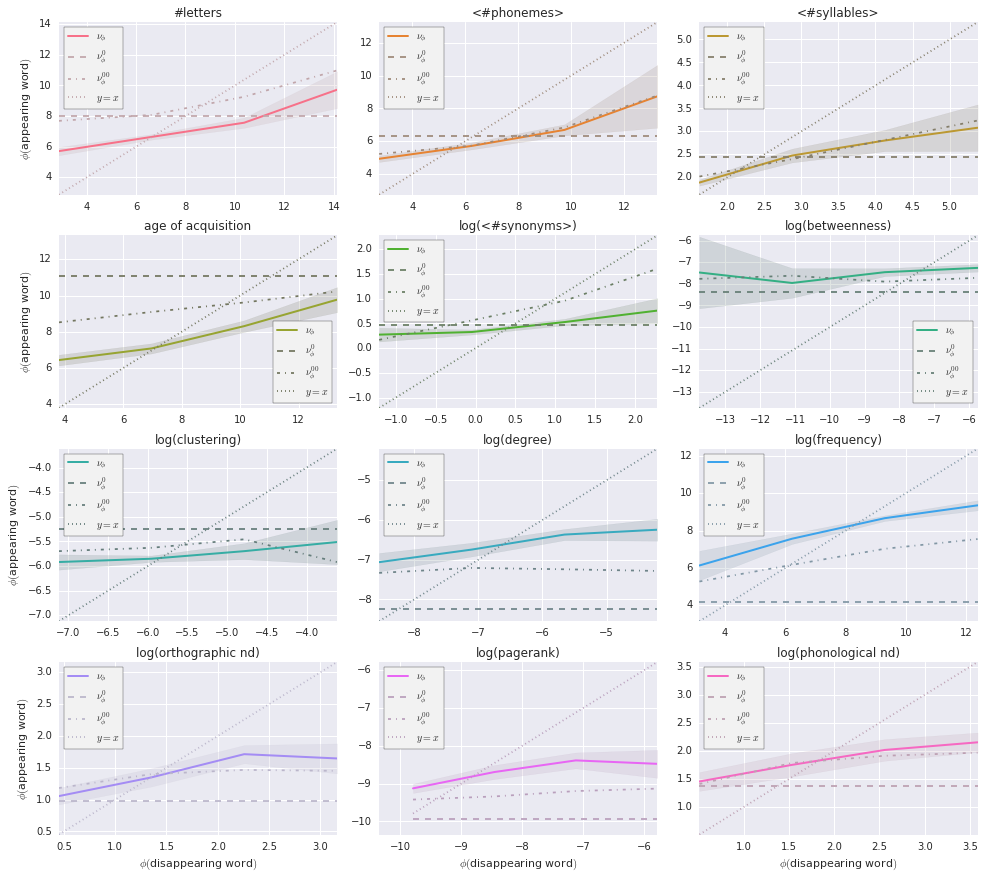

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

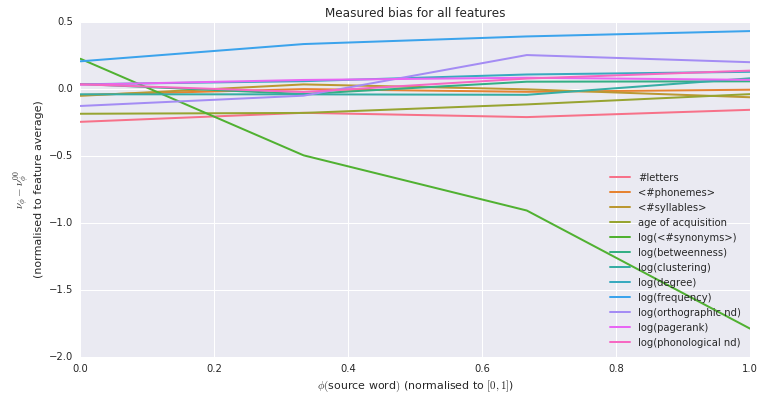

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | **  | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | **  |
H_00 | *** | *** | *** | *   |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | ns. |


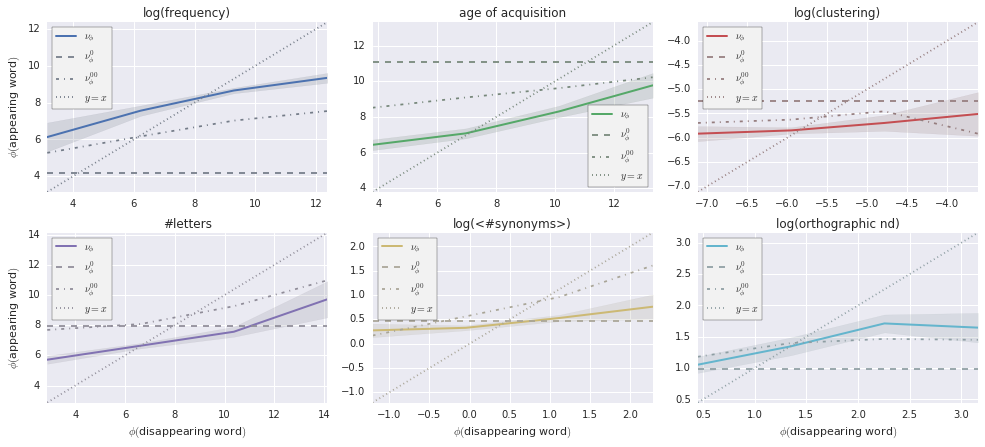

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

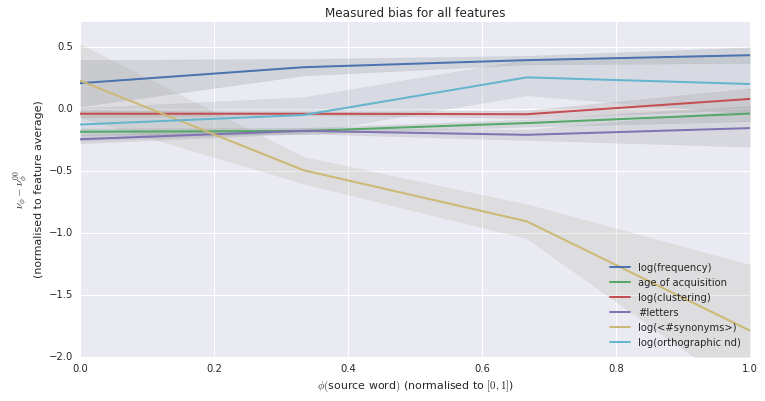

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | **  |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | **  |
H_00 | *** | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | *   |


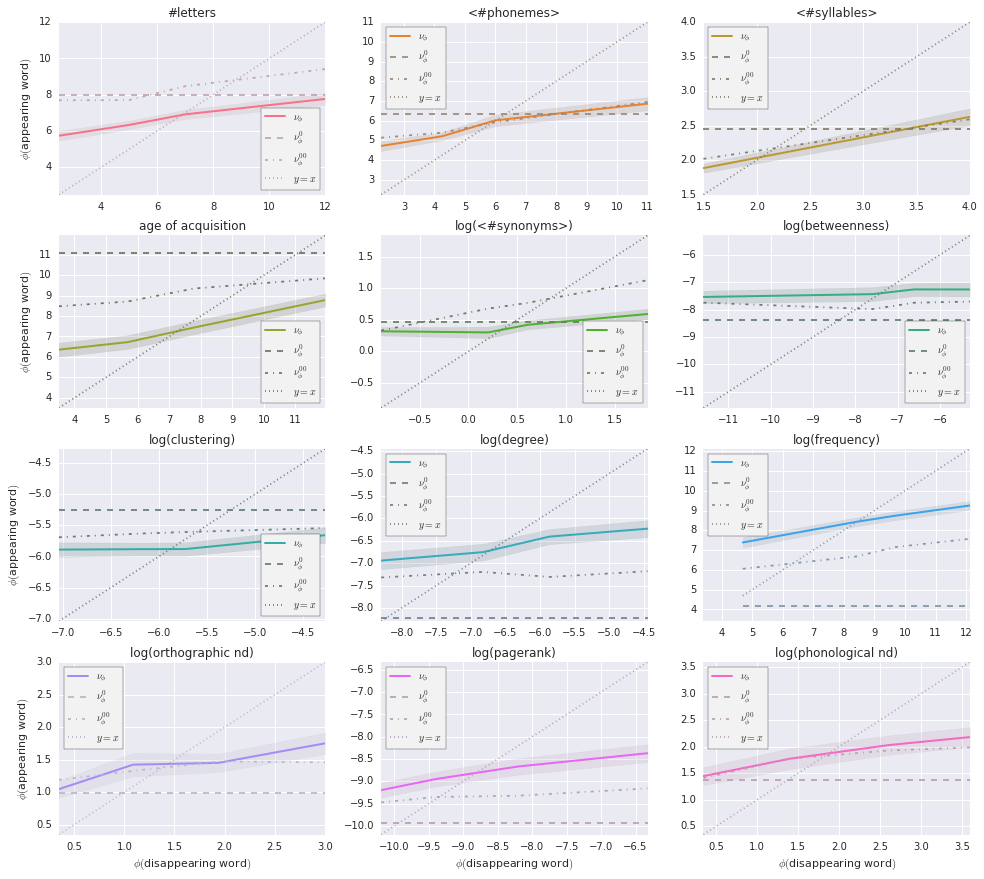

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

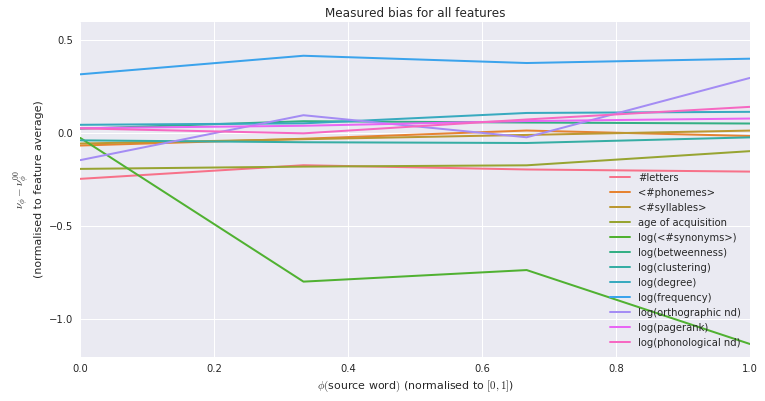

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | ns. | *** |


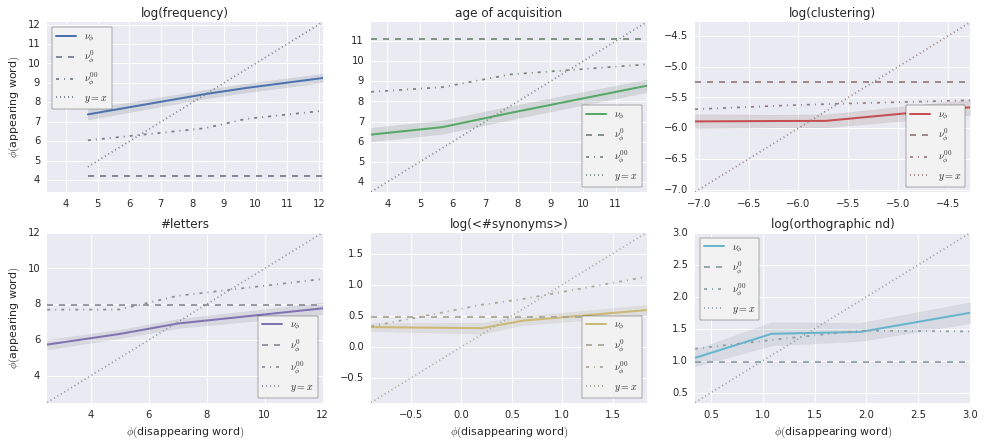

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

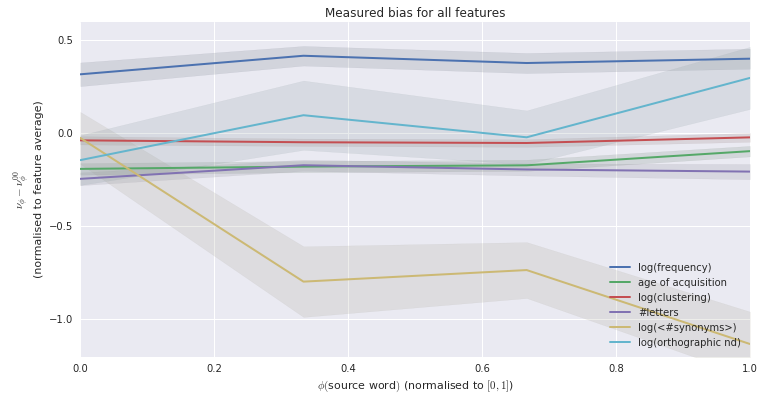

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *   | *   |
H_00 | ns. | **  | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | **  | ns. |
H_00 | ns. | *** | *** | **  |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *   | *** | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | *   | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | ns. | ns. | ns. |


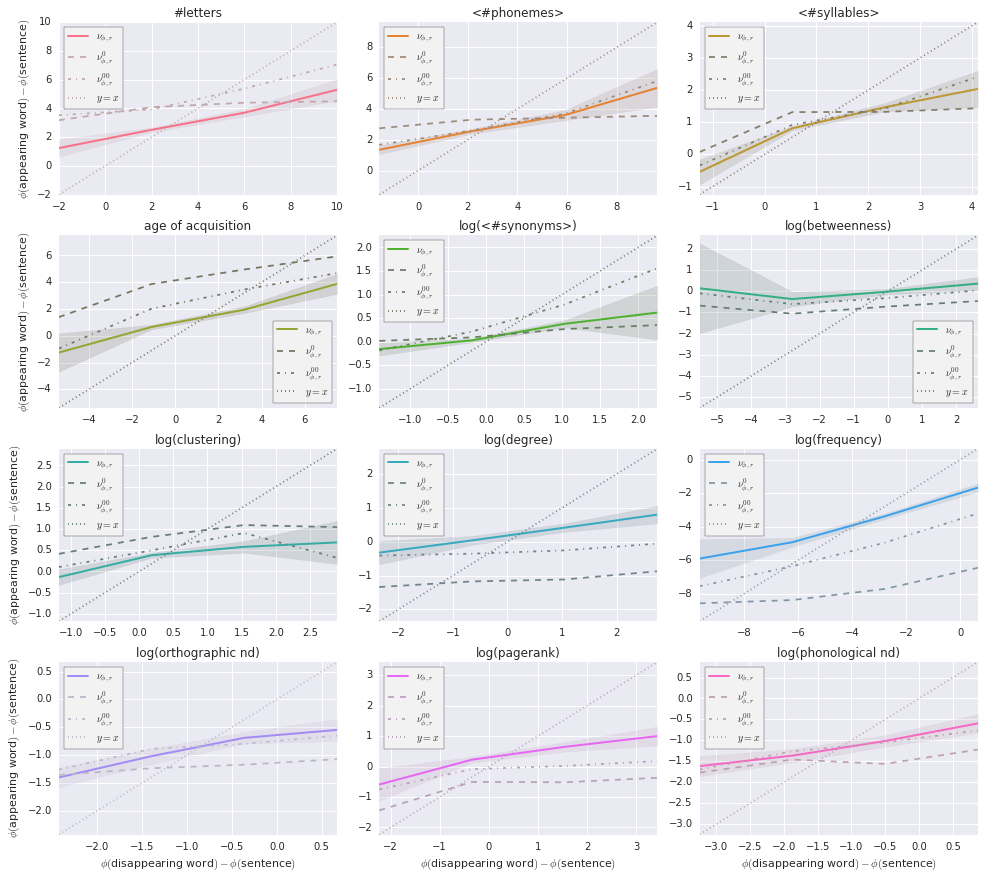

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

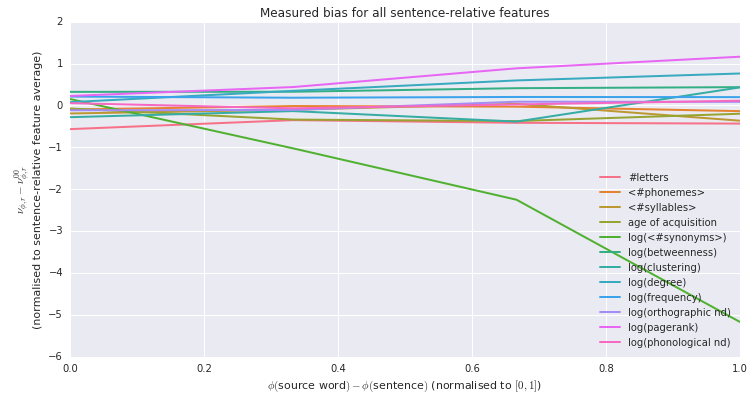

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *   |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | **  | ns. |
H_00 | ns. | *** | *** | **  |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | *   | ns. |


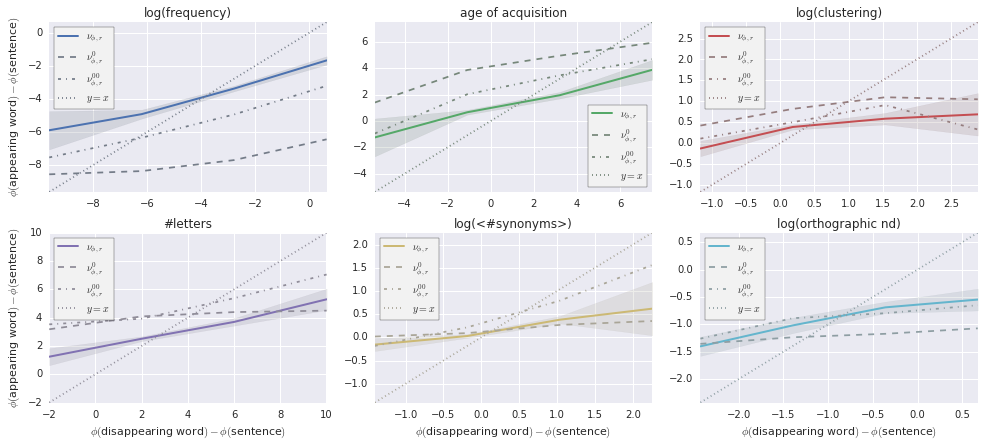

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

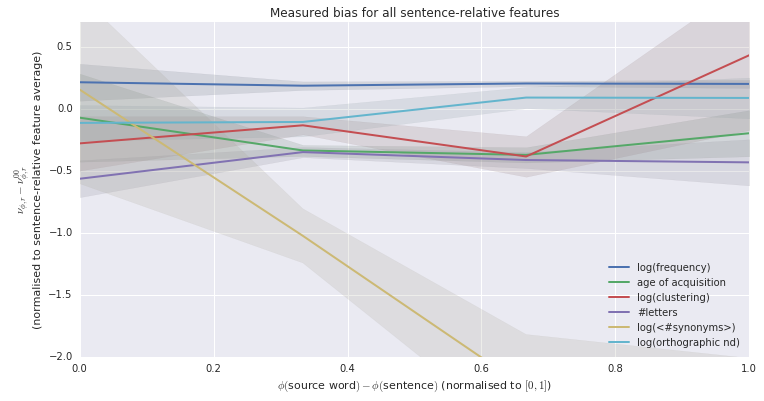

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | **  | ns. | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | **  |
H_00 | *   | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | ns. | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *   | ns. | *** |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | *   | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


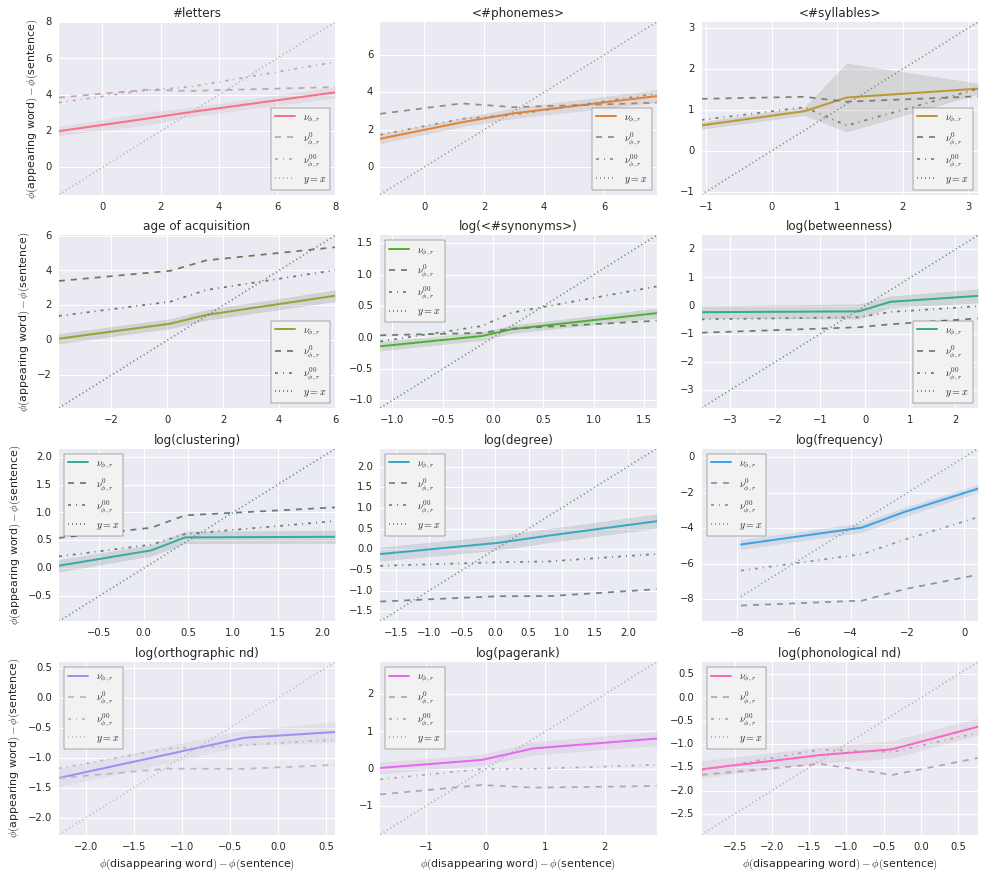

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

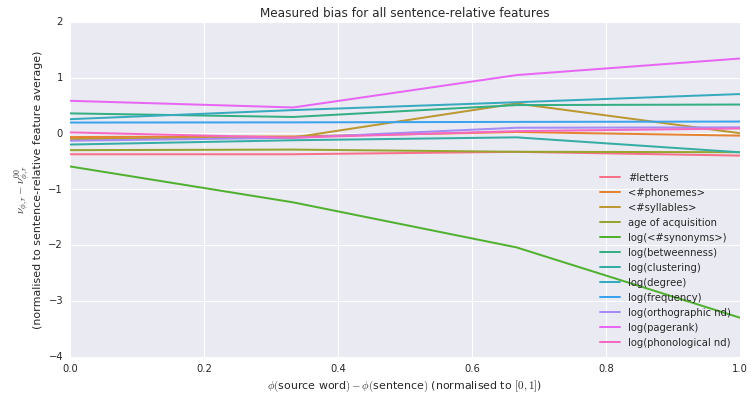

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *   | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | **  |


H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | *   | ns. |


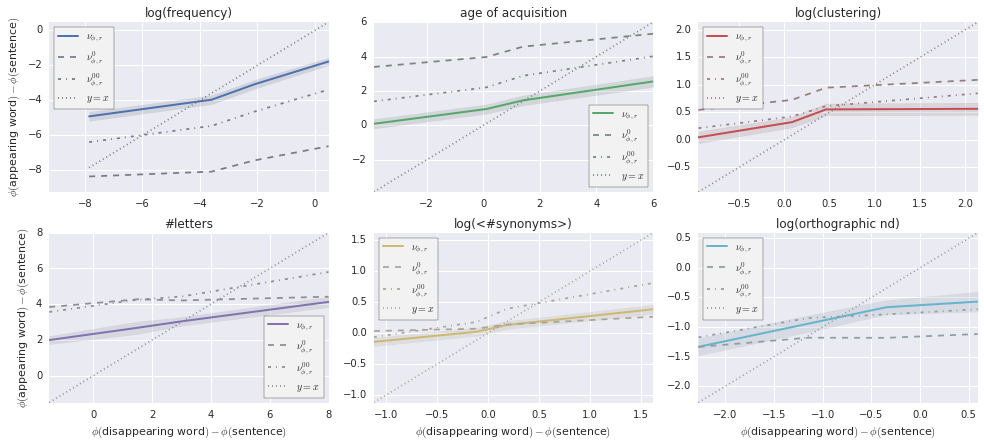

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

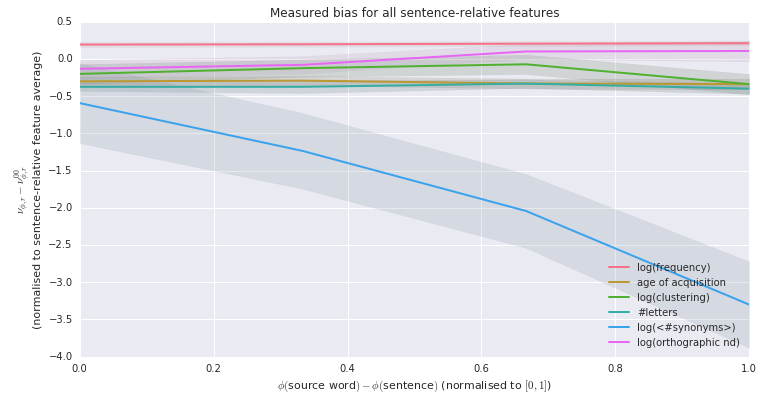

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


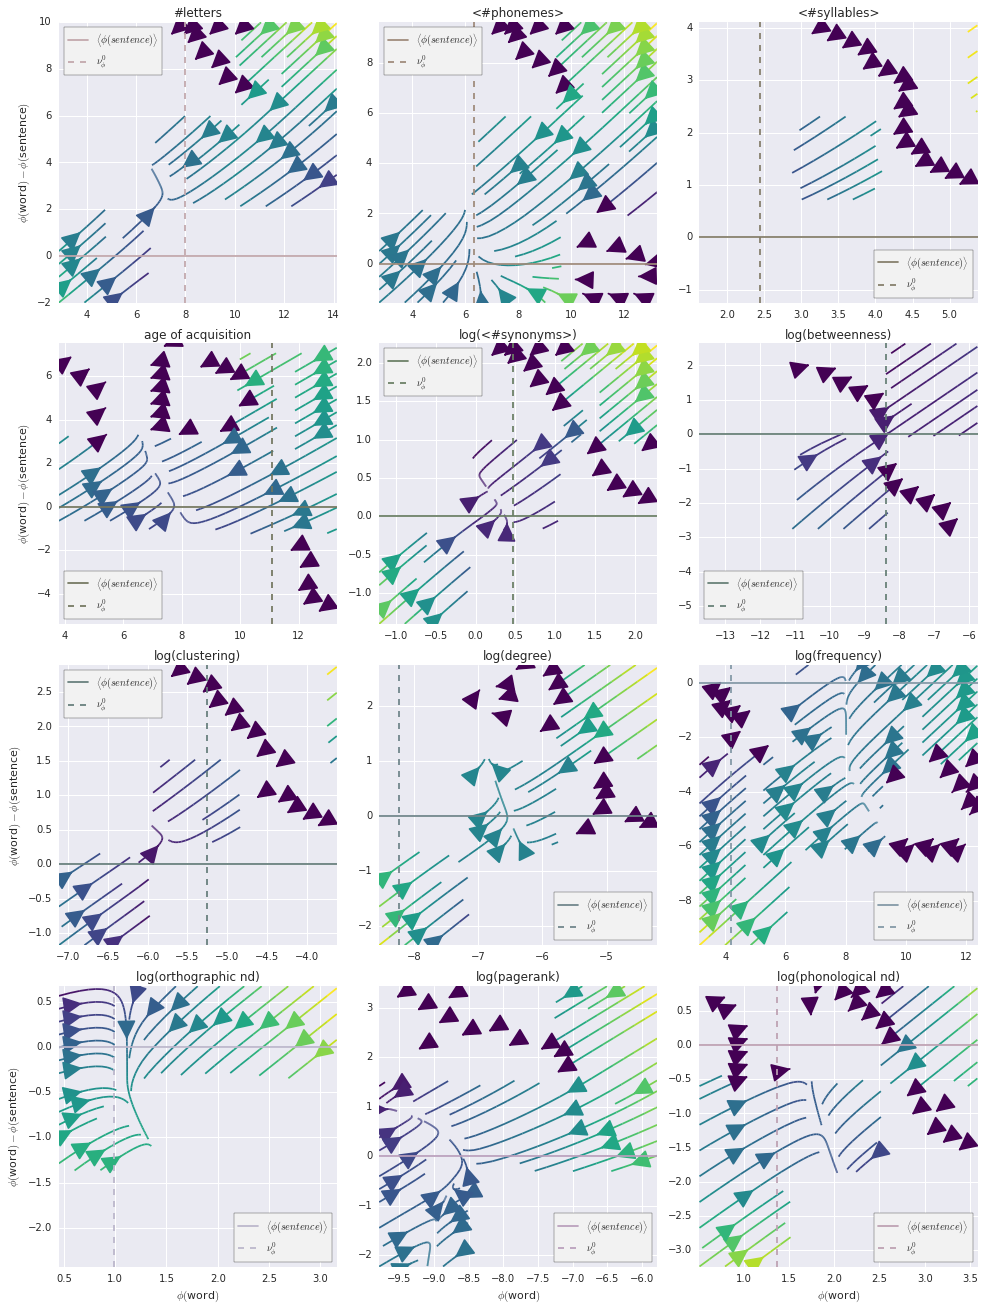

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


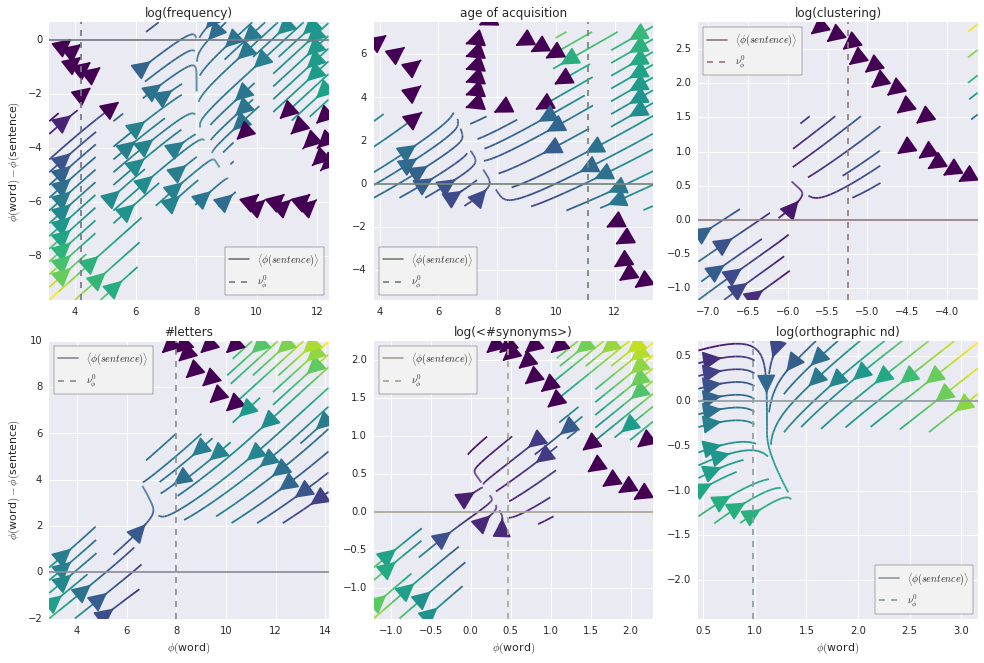

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51786487  0.17388159  0.08890802  0.07508941  0.03518086  0.03013275
  0.02110013  0.01877856  0.01680934  0.0097375   0.00739816]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.442412,0.317401,-0.087970,0.250589,0.253772,-0.421929,0.225935,0.300588,-0.384290,0.283213,-0.145876,-0.001686
Component-1,0.267895,-0.388741,0.124541,-0.280744,-0.293438,-0.425413,0.190106,-0.303450,-0.436118,0.263697,-0.165862,0.015354
Component-2,0.717075,0.140934,-0.115671,0.055199,0.651838,-0.107659,-0.033700,0.002848,-0.060739,0.071341,-0.005332,-0.055494


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 14308) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   17 of 14308) |                     | Elapsed Time: 0:00:41 ETA: 9:40:05

  0% (   43 of 14308) |                     | Elapsed Time: 0:00:41 ETA: 3:50:02

  0% (   71 of 14308) |                     | Elapsed Time: 0:00:41 ETA: 2:19:45

  0% (  102 of 14308) |                     | Elapsed Time: 0:00:42 ETA: 1:37:32

  0% (  133 of 14308) |                     | Elapsed Time: 0:00:42 ETA: 0:01:47

  1% (  160 of 14308) |                     | Elapsed Time: 0:00:42 ETA: 0:01:41

  1% (  190 of 14308) |                     | Elapsed Time: 0:00:42 ETA: 0:01:42

  1% (  220 of 14308) |                     | Elapsed Time: 0:00:42 ETA: 0:01:43

  1% (  253 of 14308) |                     | Elapsed Time: 0:00:43 ETA: 0:01:42

  1% (  285 of 14308) |                     | Elapsed Time: 0:00:43 ETA: 0:01:41

  2% (  317 of 14308) |                     | Elapsed Time: 0:00:43 ETA: 0:01:35

  2% (  344 of 14308) |                     | Elapsed Time: 0:00:43 ETA: 0:01:32

  2% (  370 of 14308) |                     | Elapsed Time: 0:00:43 ETA: 0:01:37

  2% (  395 of 14308) |                     | Elapsed Time: 0:00:44 ETA: 0:01:42

  2% (  420 of 14308) |                     | Elapsed Time: 0:00:44 ETA: 0:01:49

  3% (  445 of 14308) |                     | Elapsed Time: 0:00:44 ETA: 0:01:55

  3% (  470 of 14308) |                     | Elapsed Time: 0:00:44 ETA: 0:01:56

  3% (  495 of 14308) |                     | Elapsed Time: 0:00:44 ETA: 0:01:55

  3% (  520 of 14308) |                     | Elapsed Time: 0:00:45 ETA: 0:01:55

  3% (  551 of 14308) |                     | Elapsed Time: 0:00:45 ETA: 0:01:53

  4% (  583 of 14308) |                     | Elapsed Time: 0:00:45 ETA: 0:01:46

  4% (  614 of 14308) |                     | Elapsed Time: 0:00:45 ETA: 0:01:40

  4% (  643 of 14308) |                     | Elapsed Time: 0:00:46 ETA: 0:01:37

  4% (  663 of 14308) |                     | Elapsed Time: 0:00:46 ETA: 0:01:41

  4% (  683 of 14308) |#                    | Elapsed Time: 0:00:46 ETA: 0:01:50

  4% (  703 of 14308) |#                    | Elapsed Time: 0:00:46 ETA: 0:02:03

  5% (  726 of 14308) |#                    | Elapsed Time: 0:00:46 ETA: 0:02:17

  5% (  746 of 14308) |#                    | Elapsed Time: 0:00:47 ETA: 0:02:25

  5% (  766 of 14308) |#                    | Elapsed Time: 0:00:47 ETA: 0:02:25

  5% (  786 of 14308) |#                    | Elapsed Time: 0:00:47 ETA: 0:02:25

  5% (  806 of 14308) |#                    | Elapsed Time: 0:00:47 ETA: 0:02:25

  5% (  826 of 14308) |#                    | Elapsed Time: 0:00:48 ETA: 0:02:24

  5% (  846 of 14308) |#                    | Elapsed Time: 0:00:48 ETA: 0:02:25

  6% (  866 of 14308) |#                    | Elapsed Time: 0:00:48 ETA: 0:02:24

  6% (  886 of 14308) |#                    | Elapsed Time: 0:00:48 ETA: 0:02:24

  6% (  905 of 14308) |#                    | Elapsed Time: 0:00:48 ETA: 0:02:23

  6% (  924 of 14308) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:24

  6% (  944 of 14308) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:24

  6% (  974 of 14308) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:09

  6% (  999 of 14308) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:03

  7% ( 1020 of 14308) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:59

  7% ( 1040 of 14308) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:57

  7% ( 1062 of 14308) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:00

  7% ( 1087 of 14308) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:07

  7% ( 1115 of 14308) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:57

  7% ( 1144 of 14308) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:47

  8% ( 1172 of 14308) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:41

  8% ( 1204 of 14308) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:33

  8% ( 1236 of 14308) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:28

  8% ( 1265 of 14308) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:29

  9% ( 1291 of 14308) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:32

  9% ( 1322 of 14308) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:32

  9% ( 1341 of 14308) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:43

  9% ( 1361 of 14308) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:52

  9% ( 1381 of 14308) |##                   | Elapsed Time: 0:00:52 ETA: 0:01:57

  9% ( 1401 of 14308) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:07

  9% ( 1421 of 14308) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:11

 10% ( 1441 of 14308) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:12

 10% ( 1461 of 14308) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:12

 10% ( 1484 of 14308) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:07

 10% ( 1518 of 14308) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:51

 10% ( 1548 of 14308) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:42

 10% ( 1570 of 14308) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:41

 11% ( 1588 of 14308) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:43

 11% ( 1610 of 14308) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:53

 11% ( 1634 of 14308) |##                   | Elapsed Time: 0:00:55 ETA: 0:02:03

 11% ( 1650 of 14308) |##                   | Elapsed Time: 0:00:55 ETA: 0:02:19

 11% ( 1675 of 14308) |##                   | Elapsed Time: 0:00:55 ETA: 0:02:05

 11% ( 1706 of 14308) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:52

 12% ( 1731 of 14308) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:48

 12% ( 1758 of 14308) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:39

 12% ( 1789 of 14308) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:29

 12% ( 1819 of 14308) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:30

 12% ( 1844 of 14308) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:31

 13% ( 1864 of 14308) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:37

 13% ( 1882 of 14308) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:48

 13% ( 1900 of 14308) |##                   | Elapsed Time: 0:00:57 ETA: 0:02:05

 13% ( 1918 of 14308) |##                   | Elapsed Time: 0:00:57 ETA: 0:02:24

 13% ( 1936 of 14308) |##                   | Elapsed Time: 0:00:57 ETA: 0:02:32

 13% ( 1952 of 14308) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:33

 13% ( 1977 of 14308) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:33

 13% ( 2002 of 14308) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:19

 14% ( 2029 of 14308) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:05

 14% ( 2054 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:01:54

 14% ( 2076 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:01:49

 14% ( 2105 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:01:38

 14% ( 2132 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:01:35

 15% ( 2161 of 14308) |###                  | Elapsed Time: 0:00:59 ETA: 0:01:38

 15% ( 2188 of 14308) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:31

 15% ( 2210 of 14308) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:35

 15% ( 2232 of 14308) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:39

 15% ( 2254 of 14308) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:44

 15% ( 2281 of 14308) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:44

 16% ( 2309 of 14308) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:40

 16% ( 2335 of 14308) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:46

 16% ( 2354 of 14308) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:49

 16% ( 2383 of 14308) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:45

 16% ( 2412 of 14308) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:46

 17% ( 2444 of 14308) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:37

 17% ( 2475 of 14308) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:25

 17% ( 2495 of 14308) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:30

 17% ( 2514 of 14308) |###                  | Elapsed Time: 0:01:02 ETA: 0:01:35

 17% ( 2540 of 14308) |###                  | Elapsed Time: 0:01:03 ETA: 0:01:40

 17% ( 2567 of 14308) |###                  | Elapsed Time: 0:01:03 ETA: 0:01:44

 18% ( 2595 of 14308) |###                  | Elapsed Time: 0:01:03 ETA: 0:01:41

 18% ( 2624 of 14308) |###                  | Elapsed Time: 0:01:03 ETA: 0:01:30

 18% ( 2649 of 14308) |###                  | Elapsed Time: 0:01:03 ETA: 0:01:28

 18% ( 2683 of 14308) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:22

 18% ( 2706 of 14308) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:26

 19% ( 2740 of 14308) |####                 | Elapsed Time: 0:01:04 ETA: 0:01:22

 19% ( 2764 of 14308) |####                 | Elapsed Time: 0:01:04 ETA: 0:01:24

 19% ( 2787 of 14308) |####                 | Elapsed Time: 0:01:05 ETA: 0:01:29

 19% ( 2803 of 14308) |####                 | Elapsed Time: 0:01:05 ETA: 0:01:39

 19% ( 2819 of 14308) |####                 | Elapsed Time: 0:01:05 ETA: 0:01:51

 19% ( 2835 of 14308) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:09

 19% ( 2851 of 14308) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:28

 20% ( 2874 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:20

 20% ( 2904 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:00

 20% ( 2936 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:01:42

 20% ( 2968 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:01:29

 20% ( 3002 of 14308) |####                 | Elapsed Time: 0:01:06 ETA: 0:01:17

 21% ( 3041 of 14308) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:12

 21% ( 3073 of 14308) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:11

 21% ( 3103 of 14308) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:11

 21% ( 3135 of 14308) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:11

 22% ( 3167 of 14308) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:12

 22% ( 3196 of 14308) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:13

 22% ( 3234 of 14308) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:14

 22% ( 3257 of 14308) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:19

 22% ( 3281 of 14308) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:25

 23% ( 3305 of 14308) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:30

 23% ( 3329 of 14308) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:34

 23% ( 3351 of 14308) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:38

 23% ( 3373 of 14308) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:38

 23% ( 3399 of 14308) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:39

 23% ( 3424 of 14308) |#####                | Elapsed Time: 0:01:10 ETA: 0:01:37

 24% ( 3449 of 14308) |#####                | Elapsed Time: 0:01:10 ETA: 0:01:35

 24% ( 3470 of 14308) |#####                | Elapsed Time: 0:01:10 ETA: 0:01:35

 24% ( 3502 of 14308) |#####                | Elapsed Time: 0:01:10 ETA: 0:01:27

 24% ( 3524 of 14308) |#####                | Elapsed Time: 0:01:10 ETA: 0:01:28

 24% ( 3546 of 14308) |#####                | Elapsed Time: 0:01:11 ETA: 0:01:30

 25% ( 3577 of 14308) |#####                | Elapsed Time: 0:01:11 ETA: 0:01:26

 25% ( 3607 of 14308) |#####                | Elapsed Time: 0:01:11 ETA: 0:01:27

 25% ( 3634 of 14308) |#####                | Elapsed Time: 0:01:11 ETA: 0:01:27

 25% ( 3666 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:20

 25% ( 3698 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:15

 26% ( 3725 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:14

 26% ( 3756 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:16

 26% ( 3781 of 14308) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:17

 26% ( 3807 of 14308) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:21

 26% ( 3833 of 14308) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:24

 26% ( 3859 of 14308) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:23

 27% ( 3885 of 14308) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:25

 27% ( 3910 of 14308) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:25

 27% ( 3935 of 14308) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:27

 27% ( 3966 of 14308) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:24

 27% ( 3997 of 14308) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:21

 28% ( 4025 of 14308) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:19

 28% ( 4053 of 14308) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:18

 28% ( 4081 of 14308) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:13

 28% ( 4114 of 14308) |######               | Elapsed Time: 0:01:15 ETA: 0:01:16

 28% ( 4138 of 14308) |######               | Elapsed Time: 0:01:15 ETA: 0:01:20

 29% ( 4163 of 14308) |######               | Elapsed Time: 0:01:15 ETA: 0:01:21

 29% ( 4192 of 14308) |######               | Elapsed Time: 0:01:16 ETA: 0:01:20

 29% ( 4218 of 14308) |######               | Elapsed Time: 0:01:16 ETA: 0:01:19

 29% ( 4247 of 14308) |######               | Elapsed Time: 0:01:16 ETA: 0:01:17

 29% ( 4277 of 14308) |######               | Elapsed Time: 0:01:16 ETA: 0:01:11

 30% ( 4302 of 14308) |######               | Elapsed Time: 0:01:17 ETA: 0:01:16

 30% ( 4326 of 14308) |######               | Elapsed Time: 0:01:17 ETA: 0:01:19

 30% ( 4350 of 14308) |######               | Elapsed Time: 0:01:17 ETA: 0:01:20

 30% ( 4376 of 14308) |######               | Elapsed Time: 0:01:17 ETA: 0:01:22

 30% ( 4401 of 14308) |######               | Elapsed Time: 0:01:17 ETA: 0:01:26

 30% ( 4426 of 14308) |######               | Elapsed Time: 0:01:18 ETA: 0:01:22

 31% ( 4453 of 14308) |######               | Elapsed Time: 0:01:18 ETA: 0:01:21

 31% ( 4488 of 14308) |######               | Elapsed Time: 0:01:18 ETA: 0:01:16

 31% ( 4516 of 14308) |######               | Elapsed Time: 0:01:18 ETA: 0:01:15

 31% ( 4545 of 14308) |######               | Elapsed Time: 0:01:18 ETA: 0:01:12

 31% ( 4570 of 14308) |######               | Elapsed Time: 0:01:19 ETA: 0:01:12

 32% ( 4595 of 14308) |######               | Elapsed Time: 0:01:19 ETA: 0:01:14

 32% ( 4619 of 14308) |######               | Elapsed Time: 0:01:19 ETA: 0:01:18

 32% ( 4651 of 14308) |######               | Elapsed Time: 0:01:19 ETA: 0:01:22

 32% ( 4675 of 14308) |######               | Elapsed Time: 0:01:20 ETA: 0:01:25

 32% ( 4706 of 14308) |######               | Elapsed Time: 0:01:20 ETA: 0:01:19

 33% ( 4733 of 14308) |######               | Elapsed Time: 0:01:20 ETA: 0:01:18

 33% ( 4760 of 14308) |######               | Elapsed Time: 0:01:20 ETA: 0:01:16

 33% ( 4786 of 14308) |#######              | Elapsed Time: 0:01:20 ETA: 0:01:11

 33% ( 4814 of 14308) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:11

 33% ( 4843 of 14308) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:12

 34% ( 4869 of 14308) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:13

 34% ( 4894 of 14308) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:13

 34% ( 4920 of 14308) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:13

 34% ( 4939 of 14308) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:21

 34% ( 4952 of 14308) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:33

 34% ( 4968 of 14308) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:44

 34% ( 4984 of 14308) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:58

 34% ( 5000 of 14308) |#######              | Elapsed Time: 0:01:23 ETA: 0:02:14

 35% ( 5021 of 14308) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:59

 35% ( 5046 of 14308) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:42

 35% ( 5070 of 14308) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:33

 35% ( 5094 of 14308) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:26

 35% ( 5120 of 14308) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:18

 35% ( 5144 of 14308) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:20

 36% ( 5167 of 14308) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:20

 36% ( 5198 of 14308) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:20

 36% ( 5217 of 14308) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:24

 36% ( 5239 of 14308) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:26

 36% ( 5268 of 14308) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:22

 37% ( 5295 of 14308) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:19

 37% ( 5309 of 14308) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:26

 37% ( 5323 of 14308) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:38

 37% ( 5336 of 14308) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:49

 37% ( 5366 of 14308) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:59

 37% ( 5394 of 14308) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:41

 37% ( 5422 of 14308) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:25

 38% ( 5450 of 14308) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:13

 38% ( 5477 of 14308) |########             | Elapsed Time: 0:01:27 ETA: 0:01:05

 38% ( 5505 of 14308) |########             | Elapsed Time: 0:01:27 ETA: 0:01:05

 38% ( 5545 of 14308) |########             | Elapsed Time: 0:01:27 ETA: 0:01:05

 38% ( 5575 of 14308) |########             | Elapsed Time: 0:01:28 ETA: 0:01:03

 39% ( 5599 of 14308) |########             | Elapsed Time: 0:01:28 ETA: 0:01:05

 39% ( 5621 of 14308) |########             | Elapsed Time: 0:01:28 ETA: 0:01:07

 39% ( 5639 of 14308) |########             | Elapsed Time: 0:01:28 ETA: 0:01:13

 39% ( 5668 of 14308) |########             | Elapsed Time: 0:01:28 ETA: 0:01:14

 39% ( 5694 of 14308) |########             | Elapsed Time: 0:01:29 ETA: 0:01:15

 40% ( 5724 of 14308) |########             | Elapsed Time: 0:01:29 ETA: 0:01:11

 40% ( 5747 of 14308) |########             | Elapsed Time: 0:01:29 ETA: 0:01:11

 40% ( 5771 of 14308) |########             | Elapsed Time: 0:01:29 ETA: 0:01:08

 40% ( 5798 of 14308) |########             | Elapsed Time: 0:01:30 ETA: 0:01:08

 40% ( 5816 of 14308) |########             | Elapsed Time: 0:01:30 ETA: 0:01:13

 40% ( 5842 of 14308) |########             | Elapsed Time: 0:01:30 ETA: 0:01:14

 41% ( 5874 of 14308) |########             | Elapsed Time: 0:01:30 ETA: 0:01:09

 41% ( 5903 of 14308) |########             | Elapsed Time: 0:01:30 ETA: 0:01:09

 41% ( 5926 of 14308) |########             | Elapsed Time: 0:01:31 ETA: 0:01:09

 41% ( 5946 of 14308) |########             | Elapsed Time: 0:01:34 ETA: 0:04:20

 41% ( 5971 of 14308) |########             | Elapsed Time: 0:01:34 ETA: 0:04:34

 41% ( 5994 of 14308) |########             | Elapsed Time: 0:01:34 ETA: 0:04:52

 41% ( 6008 of 14308) |########             | Elapsed Time: 0:01:34 ETA: 0:05:34

 42% ( 6024 of 14308) |########             | Elapsed Time: 0:01:34 ETA: 0:01:29

 42% ( 6049 of 14308) |########             | Elapsed Time: 0:01:35 ETA: 0:01:30

 42% ( 6081 of 14308) |########             | Elapsed Time: 0:01:35 ETA: 0:01:26

 42% ( 6105 of 14308) |########             | Elapsed Time: 0:01:35 ETA: 0:01:21

 42% ( 6131 of 14308) |########             | Elapsed Time: 0:01:35 ETA: 0:01:09

 43% ( 6161 of 14308) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:04

 43% ( 6188 of 14308) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:04

 43% ( 6212 of 14308) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:04

 43% ( 6241 of 14308) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:01

 43% ( 6272 of 14308) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:02

 44% ( 6297 of 14308) |#########            | Elapsed Time: 0:01:37 ETA: 0:01:05

 44% ( 6320 of 14308) |#########            | Elapsed Time: 0:01:37 ETA: 0:01:04

 44% ( 6347 of 14308) |#########            | Elapsed Time: 0:01:37 ETA: 0:01:03

 44% ( 6373 of 14308) |#########            | Elapsed Time: 0:01:37 ETA: 0:01:04

 44% ( 6397 of 14308) |#########            | Elapsed Time: 0:01:37 ETA: 0:01:05

 44% ( 6416 of 14308) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:08

 45% ( 6452 of 14308) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:06

 45% ( 6480 of 14308) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:04

 45% ( 6501 of 14308) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:10

 45% ( 6515 of 14308) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:12

 45% ( 6548 of 14308) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:07

 45% ( 6577 of 14308) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:06

 46% ( 6603 of 14308) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:04

 46% ( 6632 of 14308) |#########            | Elapsed Time: 0:01:39 ETA: 0:00:58

 46% ( 6652 of 14308) |#########            | Elapsed Time: 0:01:40 ETA: 0:00:59

 46% ( 6676 of 14308) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:04

 46% ( 6699 of 14308) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:05

 46% ( 6719 of 14308) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:09

 47% ( 6742 of 14308) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:10

 47% ( 6764 of 14308) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:10

 47% ( 6780 of 14308) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:16

 47% ( 6808 of 14308) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:14

 47% ( 6830 of 14308) |##########           | Elapsed Time: 0:01:41 ETA: 0:01:13

 47% ( 6852 of 14308) |##########           | Elapsed Time: 0:01:42 ETA: 0:01:17

 48% ( 6885 of 14308) |##########           | Elapsed Time: 0:01:42 ETA: 0:01:05

 48% ( 6921 of 14308) |##########           | Elapsed Time: 0:01:42 ETA: 0:00:57

 48% ( 6938 of 14308) |##########           | Elapsed Time: 0:01:42 ETA: 0:01:00

 48% ( 6956 of 14308) |##########           | Elapsed Time: 0:01:42 ETA: 0:01:01

 48% ( 6992 of 14308) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:00

 49% ( 7019 of 14308) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:04

 49% ( 7040 of 14308) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:05

 49% ( 7070 of 14308) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:00

 49% ( 7087 of 14308) |##########           | Elapsed Time: 0:01:44 ETA: 0:01:01

 49% ( 7115 of 14308) |##########           | Elapsed Time: 0:01:44 ETA: 0:01:04

 49% ( 7134 of 14308) |##########           | Elapsed Time: 0:01:44 ETA: 0:01:04

 50% ( 7167 of 14308) |##########           | Elapsed Time: 0:01:44 ETA: 0:01:05

 50% ( 7195 of 14308) |##########           | Elapsed Time: 0:01:44 ETA: 0:01:01

 50% ( 7225 of 14308) |##########           | Elapsed Time: 0:01:45 ETA: 0:00:57

 50% ( 7248 of 14308) |##########           | Elapsed Time: 0:01:45 ETA: 0:00:59

 50% ( 7260 of 14308) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:01

 50% ( 7274 of 14308) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:13

 50% ( 7290 of 14308) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:24

 51% ( 7316 of 14308) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:31

 51% ( 7348 of 14308) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:13

 51% ( 7376 of 14308) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:01

 51% ( 7405 of 14308) |##########           | Elapsed Time: 0:01:46 ETA: 0:00:54

 51% ( 7434 of 14308) |##########           | Elapsed Time: 0:01:47 ETA: 0:00:51

 52% ( 7454 of 14308) |##########           | Elapsed Time: 0:01:47 ETA: 0:00:54

 52% ( 7483 of 14308) |##########           | Elapsed Time: 0:01:47 ETA: 0:00:53

 52% ( 7512 of 14308) |###########          | Elapsed Time: 0:01:47 ETA: 0:00:53

 52% ( 7540 of 14308) |###########          | Elapsed Time: 0:01:47 ETA: 0:00:52

 52% ( 7570 of 14308) |###########          | Elapsed Time: 0:01:48 ETA: 0:00:48

 53% ( 7596 of 14308) |###########          | Elapsed Time: 0:01:48 ETA: 0:00:49

 53% ( 7623 of 14308) |###########          | Elapsed Time: 0:01:48 ETA: 0:00:50

 53% ( 7647 of 14308) |###########          | Elapsed Time: 0:01:48 ETA: 0:00:51

 53% ( 7669 of 14308) |###########          | Elapsed Time: 0:01:49 ETA: 0:00:55

 53% ( 7691 of 14308) |###########          | Elapsed Time: 0:01:49 ETA: 0:00:57

 53% ( 7714 of 14308) |###########          | Elapsed Time: 0:01:49 ETA: 0:00:58

 54% ( 7741 of 14308) |###########          | Elapsed Time: 0:01:49 ETA: 0:00:58

 54% ( 7770 of 14308) |###########          | Elapsed Time: 0:01:49 ETA: 0:00:55

 54% ( 7803 of 14308) |###########          | Elapsed Time: 0:01:50 ETA: 0:00:50

 54% ( 7826 of 14308) |###########          | Elapsed Time: 0:01:50 ETA: 0:00:46

 54% ( 7857 of 14308) |###########          | Elapsed Time: 0:01:50 ETA: 0:00:47

 55% ( 7886 of 14308) |###########          | Elapsed Time: 0:01:50 ETA: 0:00:45

 55% ( 7914 of 14308) |###########          | Elapsed Time: 0:01:50 ETA: 0:00:45

 55% ( 7941 of 14308) |###########          | Elapsed Time: 0:01:51 ETA: 0:00:47

 55% ( 7966 of 14308) |###########          | Elapsed Time: 0:01:51 ETA: 0:00:48

 55% ( 7979 of 14308) |###########          | Elapsed Time: 0:01:51 ETA: 0:00:54

 55% ( 7993 of 14308) |###########          | Elapsed Time: 0:01:51 ETA: 0:01:04

 55% ( 8011 of 14308) |###########          | Elapsed Time: 0:01:51 ETA: 0:01:13

 56% ( 8036 of 14308) |###########          | Elapsed Time: 0:01:52 ETA: 0:01:13

 56% ( 8059 of 14308) |###########          | Elapsed Time: 0:01:52 ETA: 0:01:13

 56% ( 8081 of 14308) |###########          | Elapsed Time: 0:01:52 ETA: 0:01:04

 56% ( 8109 of 14308) |###########          | Elapsed Time: 0:01:52 ETA: 0:00:57

 56% ( 8139 of 14308) |###########          | Elapsed Time: 0:01:53 ETA: 0:00:52

 57% ( 8171 of 14308) |###########          | Elapsed Time: 0:01:53 ETA: 0:00:48

 57% ( 8198 of 14308) |############         | Elapsed Time: 0:01:53 ETA: 0:00:44

 57% ( 8228 of 14308) |############         | Elapsed Time: 0:01:53 ETA: 0:00:41

 57% ( 8258 of 14308) |############         | Elapsed Time: 0:01:53 ETA: 0:00:42

 57% ( 8291 of 14308) |############         | Elapsed Time: 0:01:54 ETA: 0:00:41

 58% ( 8323 of 14308) |############         | Elapsed Time: 0:01:54 ETA: 0:00:40

 58% ( 8349 of 14308) |############         | Elapsed Time: 0:01:54 ETA: 0:00:40

 58% ( 8361 of 14308) |############         | Elapsed Time: 0:01:54 ETA: 0:00:47

 58% ( 8371 of 14308) |############         | Elapsed Time: 0:01:54 ETA: 0:00:57

 58% ( 8381 of 14308) |############         | Elapsed Time: 0:01:55 ETA: 0:01:14

 58% ( 8391 of 14308) |############         | Elapsed Time: 0:01:55 ETA: 0:01:32

 58% ( 8422 of 14308) |############         | Elapsed Time: 0:01:55 ETA: 0:01:29

 59% ( 8449 of 14308) |############         | Elapsed Time: 0:01:55 ETA: 0:01:11

 59% ( 8467 of 14308) |############         | Elapsed Time: 0:01:56 ETA: 0:01:05

 59% ( 8490 of 14308) |############         | Elapsed Time: 0:01:56 ETA: 0:00:57

 59% ( 8507 of 14308) |############         | Elapsed Time: 0:01:56 ETA: 0:00:53

 59% ( 8537 of 14308) |############         | Elapsed Time: 0:01:56 ETA: 0:00:54

 59% ( 8558 of 14308) |############         | Elapsed Time: 0:01:56 ETA: 0:00:54

 60% ( 8596 of 14308) |############         | Elapsed Time: 0:01:57 ETA: 0:00:49

 60% ( 8614 of 14308) |############         | Elapsed Time: 0:01:57 ETA: 0:00:51

 60% ( 8635 of 14308) |############         | Elapsed Time: 0:01:57 ETA: 0:00:52

 60% ( 8654 of 14308) |############         | Elapsed Time: 0:01:57 ETA: 0:00:53

 60% ( 8674 of 14308) |############         | Elapsed Time: 0:01:58 ETA: 0:00:57

 60% ( 8706 of 14308) |############         | Elapsed Time: 0:01:58 ETA: 0:00:53

 61% ( 8736 of 14308) |############         | Elapsed Time: 0:01:58 ETA: 0:00:46

 61% ( 8764 of 14308) |############         | Elapsed Time: 0:01:58 ETA: 0:00:44

 61% ( 8793 of 14308) |############         | Elapsed Time: 0:01:58 ETA: 0:00:38

 61% ( 8820 of 14308) |############         | Elapsed Time: 0:01:59 ETA: 0:00:38

 61% ( 8850 of 14308) |############         | Elapsed Time: 0:01:59 ETA: 0:00:38

 62% ( 8875 of 14308) |#############        | Elapsed Time: 0:01:59 ETA: 0:00:40

 62% ( 8904 of 14308) |#############        | Elapsed Time: 0:01:59 ETA: 0:00:40

 62% ( 8943 of 14308) |#############        | Elapsed Time: 0:01:59 ETA: 0:00:41

 62% ( 8971 of 14308) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:39

 62% ( 8997 of 14308) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:40

 63% ( 9024 of 14308) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:40

 63% ( 9049 of 14308) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:40

 63% ( 9080 of 14308) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:41

 63% ( 9122 of 14308) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:38

 63% ( 9149 of 14308) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:38

 64% ( 9181 of 14308) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:35

 64% ( 9209 of 14308) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:35

 64% ( 9235 of 14308) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:36

 64% ( 9257 of 14308) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:38

 64% ( 9281 of 14308) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:40

 65% ( 9301 of 14308) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:44

 65% ( 9322 of 14308) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:46

 65% ( 9352 of 14308) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:43

 65% ( 9372 of 14308) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:44

 65% ( 9398 of 14308) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:43

 65% ( 9420 of 14308) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:42

 66% ( 9453 of 14308) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:39

 66% ( 9496 of 14308) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:37

 66% ( 9522 of 14308) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:36

 66% ( 9549 of 14308) |##############       | Elapsed Time: 0:02:04 ETA: 0:00:35

 66% ( 9574 of 14308) |##############       | Elapsed Time: 0:02:04 ETA: 0:00:35

 67% ( 9599 of 14308) |##############       | Elapsed Time: 0:02:05 ETA: 0:00:36

 67% ( 9622 of 14308) |##############       | Elapsed Time: 0:02:05 ETA: 0:00:39

 67% ( 9658 of 14308) |##############       | Elapsed Time: 0:02:05 ETA: 0:00:36

 67% ( 9676 of 14308) |##############       | Elapsed Time: 0:02:05 ETA: 0:00:40

 67% ( 9702 of 14308) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:38

 68% ( 9731 of 14308) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:37

 68% ( 9758 of 14308) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:36

 68% ( 9787 of 14308) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:35

 68% ( 9815 of 14308) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:32

 68% ( 9837 of 14308) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:35

 68% ( 9867 of 14308) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:33

 69% ( 9892 of 14308) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:34

 69% ( 9913 of 14308) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:36

 69% ( 9940 of 14308) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:35

 69% ( 9972 of 14308) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:34

 69% ( 9997 of 14308) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:34

 70% (10030 of 14308) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:33

 70% (10061 of 14308) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:31

 70% (10078 of 14308) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:35

 70% (10100 of 14308) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:36

 70% (10125 of 14308) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:36

 70% (10152 of 14308) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:37

 71% (10178 of 14308) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:36

 71% (10206 of 14308) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:36

 71% (10231 of 14308) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:35

 71% (10259 of 14308) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:35

 71% (10282 of 14308) |###############      | Elapsed Time: 0:02:10 ETA: 0:00:36

 72% (10303 of 14308) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:35

 72% (10330 of 14308) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:33

 72% (10374 of 14308) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:32

 72% (10402 of 14308) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:30

 72% (10427 of 14308) |###############      | Elapsed Time: 0:02:11 ETA: 0:00:29

 72% (10444 of 14308) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:30

 73% (10468 of 14308) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:32

 73% (10492 of 14308) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:35

 73% (10518 of 14308) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:34

 73% (10553 of 14308) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:33

 73% (10582 of 14308) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:30

 74% (10605 of 14308) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:29

 74% (10630 of 14308) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:29

 74% (10658 of 14308) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:28

 74% (10686 of 14308) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:28

 74% (10706 of 14308) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:30

 75% (10747 of 14308) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:27

 75% (10769 of 14308) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:28

 75% (10797 of 14308) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:28

 75% (10820 of 14308) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:28

 75% (10846 of 14308) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:28

 76% (10875 of 14308) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:28

 76% (10897 of 14308) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:28

 76% (10927 of 14308) |################     | Elapsed Time: 0:02:16 ETA: 0:00:27

 76% (10959 of 14308) |################     | Elapsed Time: 0:02:16 ETA: 0:00:25

 76% (10982 of 14308) |################     | Elapsed Time: 0:02:16 ETA: 0:00:25

 76% (11011 of 14308) |################     | Elapsed Time: 0:02:16 ETA: 0:00:25

 77% (11040 of 14308) |################     | Elapsed Time: 0:02:16 ETA: 0:00:23

 77% (11064 of 14308) |################     | Elapsed Time: 0:02:17 ETA: 0:00:25

 77% (11102 of 14308) |################     | Elapsed Time: 0:02:17 ETA: 0:00:25

 77% (11123 of 14308) |################     | Elapsed Time: 0:02:17 ETA: 0:00:25

 77% (11145 of 14308) |################     | Elapsed Time: 0:02:17 ETA: 0:00:26

 78% (11169 of 14308) |################     | Elapsed Time: 0:02:17 ETA: 0:00:26

 78% (11198 of 14308) |################     | Elapsed Time: 0:02:18 ETA: 0:00:26

 78% (11210 of 14308) |################     | Elapsed Time: 0:02:18 ETA: 0:00:30

 78% (11235 of 14308) |################     | Elapsed Time: 0:02:18 ETA: 0:00:29

 78% (11268 of 14308) |################     | Elapsed Time: 0:02:18 ETA: 0:00:26

 78% (11292 of 14308) |################     | Elapsed Time: 0:02:19 ETA: 0:00:27

 79% (11313 of 14308) |################     | Elapsed Time: 0:02:19 ETA: 0:00:26

 79% (11336 of 14308) |################     | Elapsed Time: 0:02:19 ETA: 0:00:25

 79% (11363 of 14308) |################     | Elapsed Time: 0:02:19 ETA: 0:00:25

 79% (11388 of 14308) |################     | Elapsed Time: 0:02:19 ETA: 0:00:25

 79% (11401 of 14308) |################     | Elapsed Time: 0:02:20 ETA: 0:00:27

 79% (11421 of 14308) |################     | Elapsed Time: 0:02:20 ETA: 0:00:29

 80% (11460 of 14308) |################     | Elapsed Time: 0:02:20 ETA: 0:00:26

 80% (11484 of 14308) |################     | Elapsed Time: 0:02:20 ETA: 0:00:27

 80% (11512 of 14308) |################     | Elapsed Time: 0:02:21 ETA: 0:00:24

 80% (11537 of 14308) |################     | Elapsed Time: 0:02:21 ETA: 0:00:22

 80% (11566 of 14308) |################     | Elapsed Time: 0:02:21 ETA: 0:00:21

 80% (11589 of 14308) |#################    | Elapsed Time: 0:02:21 ETA: 0:00:21

 81% (11626 of 14308) |#################    | Elapsed Time: 0:02:21 ETA: 0:00:20

 81% (11652 of 14308) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:21

 81% (11682 of 14308) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:20

 81% (11711 of 14308) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:19

 82% (11738 of 14308) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:19

 82% (11760 of 14308) |#################    | Elapsed Time: 0:02:22 ETA: 0:00:19

 82% (11778 of 14308) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:21

 82% (11805 of 14308) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:23

 82% (11831 of 14308) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:23

 82% (11858 of 14308) |#################    | Elapsed Time: 0:02:23 ETA: 0:00:21

 83% (11885 of 14308) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:20

 83% (11915 of 14308) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:18

 83% (11940 of 14308) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:18

 83% (11961 of 14308) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:19

 83% (11983 of 14308) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:22

 83% (12012 of 14308) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:21

 84% (12041 of 14308) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:21

 84% (12062 of 14308) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:22

 84% (12091 of 14308) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:18

 84% (12108 of 14308) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:18

 84% (12130 of 14308) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:19

 85% (12162 of 14308) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:18

 85% (12187 of 14308) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:17

 85% (12212 of 14308) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:18

 85% (12244 of 14308) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:15

 85% (12270 of 14308) |##################   | Elapsed Time: 0:02:27 ETA: 0:00:15

 85% (12297 of 14308) |##################   | Elapsed Time: 0:02:27 ETA: 0:00:15

 86% (12323 of 14308) |##################   | Elapsed Time: 0:02:27 ETA: 0:00:15

 86% (12355 of 14308) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:14

 86% (12377 of 14308) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:15

 86% (12407 of 14308) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:14

 86% (12433 of 14308) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:14

 87% (12457 of 14308) |##################   | Elapsed Time: 0:02:28 ETA: 0:00:15

 87% (12484 of 14308) |##################   | Elapsed Time: 0:02:29 ETA: 0:00:14

 87% (12520 of 14308) |##################   | Elapsed Time: 0:02:29 ETA: 0:00:14

 87% (12546 of 14308) |##################   | Elapsed Time: 0:02:29 ETA: 0:00:14

 87% (12571 of 14308) |##################   | Elapsed Time: 0:02:29 ETA: 0:00:14

 88% (12601 of 14308) |##################   | Elapsed Time: 0:02:29 ETA: 0:00:13

 88% (12628 of 14308) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:12

 88% (12653 of 14308) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:13

 88% (12682 of 14308) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:12

 88% (12714 of 14308) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:11

 88% (12734 of 14308) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:12

 89% (12756 of 14308) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:13

 89% (12787 of 14308) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:12

 89% (12817 of 14308) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:11

 89% (12849 of 14308) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:10

 90% (12878 of 14308) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:10

 90% (12898 of 14308) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:10

 90% (12925 of 14308) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:10

 90% (12947 of 14308) |###################  | Elapsed Time: 0:02:32 ETA: 0:00:11

 90% (12963 of 14308) |###################  | Elapsed Time: 0:02:32 ETA: 0:00:13

 90% (12991 of 14308) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:11

 90% (13013 of 14308) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:11

 91% (13038 of 14308) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:12

 91% (13057 of 14308) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:11

 91% (13087 of 14308) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:10

 91% (13114 of 14308) |###################  | Elapsed Time: 0:02:34 ETA: 0:00:09

 91% (13143 of 14308) |###################  | Elapsed Time: 0:02:34 ETA: 0:00:09

 91% (13163 of 14308) |###################  | Elapsed Time: 0:02:34 ETA: 0:00:09

 92% (13186 of 14308) |###################  | Elapsed Time: 0:02:34 ETA: 0:00:09

 92% (13204 of 14308) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:10

 92% (13224 of 14308) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:11

 92% (13242 of 14308) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:12

 92% (13268 of 14308) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:11

 92% (13294 of 14308) |###################  | Elapsed Time: 0:02:35 ETA: 0:00:09

 93% (13321 of 14308) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:08

 93% (13351 of 14308) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:07

 93% (13380 of 14308) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:06

 93% (13400 of 14308) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:07

 93% (13428 of 14308) |###################  | Elapsed Time: 0:02:36 ETA: 0:00:06

 94% (13459 of 14308) |###################  | Elapsed Time: 0:02:37 ETA: 0:00:06

 94% (13484 of 14308) |###################  | Elapsed Time: 0:02:37 ETA: 0:00:06

 94% (13516 of 14308) |###################  | Elapsed Time: 0:02:37 ETA: 0:00:05

 94% (13545 of 14308) |###################  | Elapsed Time: 0:02:37 ETA: 0:00:05

 94% (13571 of 14308) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:05

 95% (13593 of 14308) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:05

 95% (13622 of 14308) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:05

 95% (13651 of 14308) |#################### | Elapsed Time: 0:02:38 ETA: 0:00:05

 95% (13681 of 14308) |#################### | Elapsed Time: 0:02:38 ETA: 0:00:05

 95% (13705 of 14308) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:04

 95% (13728 of 14308) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:04

 96% (13750 of 14308) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:04

 96% (13772 of 14308) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:04

 96% (13784 of 14308) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:05

 96% (13807 of 14308) |#################### | Elapsed Time: 0:02:40 ETA: 0:00:05

 96% (13828 of 14308) |#################### | Elapsed Time: 0:02:40 ETA: 0:00:04

 96% (13853 of 14308) |#################### | Elapsed Time: 0:02:40 ETA: 0:00:04

 97% (13880 of 14308) |#################### | Elapsed Time: 0:02:40 ETA: 0:00:03

 97% (13908 of 14308) |#################### | Elapsed Time: 0:02:40 ETA: 0:00:03

 97% (13933 of 14308) |#################### | Elapsed Time: 0:02:41 ETA: 0:00:03

 97% (13966 of 14308) |#################### | Elapsed Time: 0:02:41 ETA: 0:00:02

 97% (13994 of 14308) |#################### | Elapsed Time: 0:02:41 ETA: 0:00:02

 97% (14014 of 14308) |#################### | Elapsed Time: 0:02:41 ETA: 0:00:02

 98% (14041 of 14308) |#################### | Elapsed Time: 0:02:42 ETA: 0:00:02

 98% (14062 of 14308) |#################### | Elapsed Time: 0:02:42 ETA: 0:00:02

 98% (14082 of 14308) |#################### | Elapsed Time: 0:02:42 ETA: 0:00:02

 98% (14110 of 14308) |#################### | Elapsed Time: 0:02:42 ETA: 0:00:01

 98% (14146 of 14308) |#################### | Elapsed Time: 0:02:42 ETA: 0:00:01

 99% (14168 of 14308) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:01

 99% (14192 of 14308) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:00

 99% (14217 of 14308) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:00

 99% (14244 of 14308) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:00

 99% (14269 of 14308) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:00

100% (14308 of 14308) |####################| Elapsed Time: 0:02:44 Time: 0:02:44


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | **  | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |



---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | ns. | ns. |


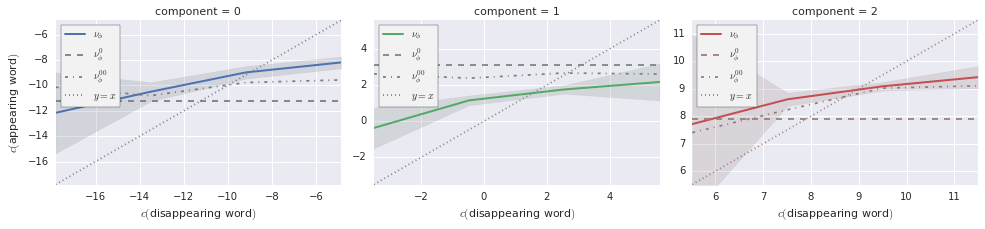

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.67483025  0.18244027]



,aoa,frequency,letters_count
Component-0,-0.735332,0.371846,-0.566585
Component-1,0.396944,-0.441303,-0.804790


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 14308) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   15 of 14308) |                     | Elapsed Time: 0:00:03 ETA: 0:48:34

  0% (   44 of 14308) |                     | Elapsed Time: 0:00:03 ETA: 0:17:38

  0% (   78 of 14308) |                     | Elapsed Time: 0:00:03 ETA: 0:10:34

  0% (  113 of 14308) |                     | Elapsed Time: 0:00:03 ETA: 0:07:42

  1% (  150 of 14308) |                     | Elapsed Time: 0:00:03 ETA: 0:01:28

  1% (  194 of 14308) |                     | Elapsed Time: 0:00:04 ETA: 0:01:27

  1% (  228 of 14308) |                     | Elapsed Time: 0:00:04 ETA: 0:01:25

  1% (  263 of 14308) |                     | Elapsed Time: 0:00:04 ETA: 0:01:25

  2% (  299 of 14308) |                     | Elapsed Time: 0:00:04 ETA: 0:01:25

  2% (  333 of 14308) |                     | Elapsed Time: 0:00:05 ETA: 0:01:25

  2% (  373 of 14308) |                     | Elapsed Time: 0:00:05 ETA: 0:01:25

  2% (  402 of 14308) |                     | Elapsed Time: 0:00:05 ETA: 0:01:28

  3% (  432 of 14308) |                     | Elapsed Time: 0:00:05 ETA: 0:01:30

  3% (  462 of 14308) |                     | Elapsed Time: 0:00:05 ETA: 0:01:33

  3% (  492 of 14308) |                     | Elapsed Time: 0:00:06 ETA: 0:01:35

  3% (  522 of 14308) |                     | Elapsed Time: 0:00:06 ETA: 0:01:34

  3% (  552 of 14308) |                     | Elapsed Time: 0:00:06 ETA: 0:01:33

  4% (  588 of 14308) |                     | Elapsed Time: 0:00:06 ETA: 0:01:29

  4% (  619 of 14308) |                     | Elapsed Time: 0:00:06 ETA: 0:01:28

  4% (  651 of 14308) |                     | Elapsed Time: 0:00:07 ETA: 0:01:27

  4% (  677 of 14308) |                     | Elapsed Time: 0:00:07 ETA: 0:01:29

  4% (  703 of 14308) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:34

  5% (  729 of 14308) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:41

  5% (  755 of 14308) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:46

  5% (  780 of 14308) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:49

  5% (  806 of 14308) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:49

  5% (  832 of 14308) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:49

  5% (  858 of 14308) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:49

  6% (  895 of 14308) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:48

  6% (  921 of 14308) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:48

  6% (  947 of 14308) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:48

  6% (  982 of 14308) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:40

  7% ( 1010 of 14308) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:38

  7% ( 1038 of 14308) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:35

  7% ( 1074 of 14308) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:33

  7% ( 1107 of 14308) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:31

  7% ( 1142 of 14308) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:28

  8% ( 1175 of 14308) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:25

  8% ( 1211 of 14308) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:21

  8% ( 1252 of 14308) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:18

  8% ( 1286 of 14308) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:17

  9% ( 1322 of 14308) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:17

  9% ( 1350 of 14308) |#                    | Elapsed Time: 0:00:12 ETA: 0:01:19

  9% ( 1380 of 14308) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:22

  9% ( 1410 of 14308) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:25

 10% ( 1446 of 14308) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:28

 10% ( 1476 of 14308) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:28

 10% ( 1516 of 14308) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:22

 10% ( 1555 of 14308) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:17

 11% ( 1584 of 14308) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:17

 11% ( 1627 of 14308) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:17

 11% ( 1654 of 14308) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:20

 11% ( 1693 of 14308) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:21

 12% ( 1728 of 14308) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:20

 12% ( 1763 of 14308) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:16

 12% ( 1809 of 14308) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:11

 12% ( 1845 of 14308) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:10

 13% ( 1873 of 14308) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:14

 13% ( 1899 of 14308) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:18

 13% ( 1925 of 14308) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:24

 13% ( 1951 of 14308) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:34

 13% ( 1981 of 14308) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:38

 14% ( 2014 of 14308) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:32

 14% ( 2048 of 14308) |###                  | Elapsed Time: 0:00:16 ETA: 0:01:27

 14% ( 2079 of 14308) |###                  | Elapsed Time: 0:00:16 ETA: 0:01:23

 14% ( 2113 of 14308) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:18

 15% ( 2147 of 14308) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:16

 15% ( 2179 of 14308) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:17

 15% ( 2210 of 14308) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:16

 15% ( 2240 of 14308) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:18

 15% ( 2273 of 14308) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:18

 16% ( 2307 of 14308) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:17

 16% ( 2341 of 14308) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:18

 16% ( 2373 of 14308) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:17

 16% ( 2406 of 14308) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:15

 17% ( 2442 of 14308) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:15

 17% ( 2478 of 14308) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:12

 17% ( 2521 of 14308) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:12

 17% ( 2555 of 14308) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:12

 18% ( 2590 of 14308) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:11

 18% ( 2626 of 14308) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:11

 18% ( 2660 of 14308) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:10

 18% ( 2698 of 14308) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:07

 19% ( 2737 of 14308) |####                 | Elapsed Time: 0:00:20 ETA: 0:01:05

 19% ( 2771 of 14308) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:06

 19% ( 2800 of 14308) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:09

 19% ( 2825 of 14308) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:15

 20% ( 2862 of 14308) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:20

 20% ( 2897 of 14308) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:21

 20% ( 2935 of 14308) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:18

 20% ( 2973 of 14308) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:12

 21% ( 3011 of 14308) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:06

 21% ( 3059 of 14308) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:02

 21% ( 3097 of 14308) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:01

 21% ( 3135 of 14308) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:01

 22% ( 3172 of 14308) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:01

 22% ( 3220 of 14308) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:01

 22% ( 3254 of 14308) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:02

 22% ( 3286 of 14308) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:04

 23% ( 3317 of 14308) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:06

 23% ( 3348 of 14308) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:09

 23% ( 3380 of 14308) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:11

 23% ( 3416 of 14308) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:09

 24% ( 3450 of 14308) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:09

 24% ( 3484 of 14308) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:07

 24% ( 3519 of 14308) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:05

 24% ( 3551 of 14308) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:05

 25% ( 3595 of 14308) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:06

 25% ( 3632 of 14308) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:03

 25% ( 3671 of 14308) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:02

 25% ( 3710 of 14308) |#####                | Elapsed Time: 0:00:26 ETA: 0:00:59

 26% ( 3756 of 14308) |#####                | Elapsed Time: 0:00:27 ETA: 0:00:59

 26% ( 3790 of 14308) |#####                | Elapsed Time: 0:00:27 ETA: 0:00:59

 26% ( 3824 of 14308) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:00

 26% ( 3857 of 14308) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:02

 27% ( 3889 of 14308) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:03

 27% ( 3935 of 14308) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:03

 27% ( 3973 of 14308) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:02

 28% ( 4008 of 14308) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:01

 28% ( 4043 of 14308) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:00

 28% ( 4079 of 14308) |#####                | Elapsed Time: 0:00:28 ETA: 0:00:59

 28% ( 4114 of 14308) |######               | Elapsed Time: 0:00:29 ETA: 0:00:59

 28% ( 4146 of 14308) |######               | Elapsed Time: 0:00:29 ETA: 0:01:01

 29% ( 4182 of 14308) |######               | Elapsed Time: 0:00:29 ETA: 0:01:00

 29% ( 4218 of 14308) |######               | Elapsed Time: 0:00:29 ETA: 0:00:59

 29% ( 4255 of 14308) |######               | Elapsed Time: 0:00:30 ETA: 0:00:58

 30% ( 4293 of 14308) |######               | Elapsed Time: 0:00:30 ETA: 0:00:57

 30% ( 4326 of 14308) |######               | Elapsed Time: 0:00:30 ETA: 0:00:57

 30% ( 4357 of 14308) |######               | Elapsed Time: 0:00:30 ETA: 0:00:59

 30% ( 4391 of 14308) |######               | Elapsed Time: 0:00:30 ETA: 0:00:59

 30% ( 4423 of 14308) |######               | Elapsed Time: 0:00:31 ETA: 0:01:01

 31% ( 4472 of 14308) |######               | Elapsed Time: 0:00:31 ETA: 0:01:01

 31% ( 4506 of 14308) |######               | Elapsed Time: 0:00:31 ETA: 0:01:00

 31% ( 4541 of 14308) |######               | Elapsed Time: 0:00:31 ETA: 0:00:58

 31% ( 4575 of 14308) |######               | Elapsed Time: 0:00:31 ETA: 0:00:57

 32% ( 4609 of 14308) |######               | Elapsed Time: 0:00:32 ETA: 0:00:57

 32% ( 4651 of 14308) |######               | Elapsed Time: 0:00:32 ETA: 0:00:57

 32% ( 4685 of 14308) |######               | Elapsed Time: 0:00:32 ETA: 0:00:58

 33% ( 4722 of 14308) |######               | Elapsed Time: 0:00:32 ETA: 0:00:56

 33% ( 4758 of 14308) |######               | Elapsed Time: 0:00:33 ETA: 0:00:56

 33% ( 4794 of 14308) |#######              | Elapsed Time: 0:00:33 ETA: 0:00:55

 33% ( 4829 of 14308) |#######              | Elapsed Time: 0:00:33 ETA: 0:00:53

 33% ( 4862 of 14308) |#######              | Elapsed Time: 0:00:33 ETA: 0:00:55

 34% ( 4895 of 14308) |#######              | Elapsed Time: 0:00:33 ETA: 0:00:56

 34% ( 4929 of 14308) |#######              | Elapsed Time: 0:00:34 ETA: 0:00:57

 34% ( 4952 of 14308) |#######              | Elapsed Time: 0:00:34 ETA: 0:01:03

 34% ( 4977 of 14308) |#######              | Elapsed Time: 0:00:34 ETA: 0:01:07

 35% ( 5008 of 14308) |#######              | Elapsed Time: 0:00:34 ETA: 0:01:10

 35% ( 5043 of 14308) |#######              | Elapsed Time: 0:00:34 ETA: 0:01:09

 35% ( 5076 of 14308) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:06

 35% ( 5111 of 14308) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:01

 35% ( 5142 of 14308) |#######              | Elapsed Time: 0:00:35 ETA: 0:00:58

 36% ( 5187 of 14308) |#######              | Elapsed Time: 0:00:35 ETA: 0:00:56

 36% ( 5217 of 14308) |#######              | Elapsed Time: 0:00:36 ETA: 0:00:58

 36% ( 5249 of 14308) |#######              | Elapsed Time: 0:00:36 ETA: 0:00:58

 36% ( 5286 of 14308) |#######              | Elapsed Time: 0:00:36 ETA: 0:00:56

 37% ( 5310 of 14308) |#######              | Elapsed Time: 0:00:36 ETA: 0:00:59

 37% ( 5332 of 14308) |#######              | Elapsed Time: 0:00:36 ETA: 0:01:04

 37% ( 5366 of 14308) |#######              | Elapsed Time: 0:00:37 ETA: 0:01:05

 37% ( 5403 of 14308) |#######              | Elapsed Time: 0:00:37 ETA: 0:01:03

 38% ( 5438 of 14308) |#######              | Elapsed Time: 0:00:37 ETA: 0:01:01

 38% ( 5476 of 14308) |########             | Elapsed Time: 0:00:37 ETA: 0:00:54

 38% ( 5512 of 14308) |########             | Elapsed Time: 0:00:37 ETA: 0:00:49

 38% ( 5564 of 14308) |########             | Elapsed Time: 0:00:38 ETA: 0:00:48

 39% ( 5600 of 14308) |########             | Elapsed Time: 0:00:38 ETA: 0:00:49

 39% ( 5632 of 14308) |########             | Elapsed Time: 0:00:38 ETA: 0:00:50

 39% ( 5663 of 14308) |########             | Elapsed Time: 0:00:38 ETA: 0:00:51

 39% ( 5696 of 14308) |########             | Elapsed Time: 0:00:39 ETA: 0:00:52

 40% ( 5741 of 14308) |########             | Elapsed Time: 0:00:39 ETA: 0:00:53

 40% ( 5775 of 14308) |########             | Elapsed Time: 0:00:39 ETA: 0:00:52

 40% ( 5807 of 14308) |########             | Elapsed Time: 0:00:39 ETA: 0:00:51

 40% ( 5839 of 14308) |########             | Elapsed Time: 0:00:39 ETA: 0:00:52

 41% ( 5877 of 14308) |########             | Elapsed Time: 0:00:40 ETA: 0:00:51

 41% ( 5919 of 14308) |########             | Elapsed Time: 0:00:40 ETA: 0:00:51

 41% ( 5950 of 14308) |########             | Elapsed Time: 0:00:40 ETA: 0:00:52

 41% ( 5982 of 14308) |########             | Elapsed Time: 0:00:40 ETA: 0:00:51

 41% ( 6009 of 14308) |########             | Elapsed Time: 0:00:41 ETA: 0:00:55

 42% ( 6036 of 14308) |########             | Elapsed Time: 0:00:41 ETA: 0:00:58

 42% ( 6081 of 14308) |########             | Elapsed Time: 0:00:41 ETA: 0:00:56

 42% ( 6114 of 14308) |########             | Elapsed Time: 0:00:41 ETA: 0:00:56

 42% ( 6151 of 14308) |#########            | Elapsed Time: 0:00:41 ETA: 0:00:53

 43% ( 6187 of 14308) |#########            | Elapsed Time: 0:00:42 ETA: 0:00:48

 43% ( 6220 of 14308) |#########            | Elapsed Time: 0:00:42 ETA: 0:00:48

 43% ( 6260 of 14308) |#########            | Elapsed Time: 0:00:42 ETA: 0:00:47

 43% ( 6293 of 14308) |#########            | Elapsed Time: 0:00:42 ETA: 0:00:47

 44% ( 6325 of 14308) |#########            | Elapsed Time: 0:00:43 ETA: 0:00:49

 44% ( 6359 of 14308) |#########            | Elapsed Time: 0:00:43 ETA: 0:00:48

 44% ( 6395 of 14308) |#########            | Elapsed Time: 0:00:43 ETA: 0:00:48

 45% ( 6439 of 14308) |#########            | Elapsed Time: 0:00:43 ETA: 0:00:48

 45% ( 6475 of 14308) |#########            | Elapsed Time: 0:00:43 ETA: 0:00:46

 45% ( 6506 of 14308) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:47

 45% ( 6539 of 14308) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:47

 45% ( 6576 of 14308) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:46

 46% ( 6618 of 14308) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:46

 46% ( 6650 of 14308) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:46

 46% ( 6684 of 14308) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:44

 46% ( 6716 of 14308) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:46

 47% ( 6750 of 14308) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:46

 47% ( 6779 of 14308) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:48

 47% ( 6813 of 14308) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:48

 47% ( 6843 of 14308) |##########           | Elapsed Time: 0:00:46 ETA: 0:00:49

 48% ( 6877 of 14308) |##########           | Elapsed Time: 0:00:46 ETA: 0:00:48

 48% ( 6915 of 14308) |##########           | Elapsed Time: 0:00:46 ETA: 0:00:46

 48% ( 6943 of 14308) |##########           | Elapsed Time: 0:00:46 ETA: 0:00:47

 48% ( 6976 of 14308) |##########           | Elapsed Time: 0:00:47 ETA: 0:00:46

 49% ( 7012 of 14308) |##########           | Elapsed Time: 0:00:47 ETA: 0:00:45

 49% ( 7038 of 14308) |##########           | Elapsed Time: 0:00:47 ETA: 0:00:48

 49% ( 7072 of 14308) |##########           | Elapsed Time: 0:00:47 ETA: 0:00:47

 49% ( 7102 of 14308) |##########           | Elapsed Time: 0:00:47 ETA: 0:00:46

 49% ( 7134 of 14308) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:48

 50% ( 7171 of 14308) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:47

 50% ( 7204 of 14308) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:46

 50% ( 7242 of 14308) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:43

 50% ( 7263 of 14308) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:48

 50% ( 7287 of 14308) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:49

 51% ( 7333 of 14308) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:49

 51% ( 7367 of 14308) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:49

 51% ( 7404 of 14308) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:46

 51% ( 7437 of 14308) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:42

 52% ( 7470 of 14308) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:41

 52% ( 7512 of 14308) |###########          | Elapsed Time: 0:00:50 ETA: 0:00:41

 52% ( 7548 of 14308) |###########          | Elapsed Time: 0:00:50 ETA: 0:00:40

 52% ( 7583 of 14308) |###########          | Elapsed Time: 0:00:50 ETA: 0:00:40

 53% ( 7618 of 14308) |###########          | Elapsed Time: 0:00:51 ETA: 0:00:39

 53% ( 7650 of 14308) |###########          | Elapsed Time: 0:00:51 ETA: 0:00:39

 53% ( 7691 of 14308) |###########          | Elapsed Time: 0:00:51 ETA: 0:00:40

 53% ( 7723 of 14308) |###########          | Elapsed Time: 0:00:51 ETA: 0:00:41

 54% ( 7757 of 14308) |###########          | Elapsed Time: 0:00:52 ETA: 0:00:41

 54% ( 7794 of 14308) |###########          | Elapsed Time: 0:00:52 ETA: 0:00:40

 54% ( 7829 of 14308) |###########          | Elapsed Time: 0:00:52 ETA: 0:00:38

 55% ( 7870 of 14308) |###########          | Elapsed Time: 0:00:52 ETA: 0:00:36

 55% ( 7905 of 14308) |###########          | Elapsed Time: 0:00:52 ETA: 0:00:36

 55% ( 7941 of 14308) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:36

 55% ( 7973 of 14308) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:38

 55% ( 7994 of 14308) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:42

 56% ( 8021 of 14308) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:44

 56% ( 8064 of 14308) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:45

 56% ( 8095 of 14308) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:45

 56% ( 8132 of 14308) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:41

 57% ( 8167 of 14308) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:38

 57% ( 8202 of 14308) |############         | Elapsed Time: 0:00:54 ETA: 0:00:37

 57% ( 8246 of 14308) |############         | Elapsed Time: 0:00:55 ETA: 0:00:34

 57% ( 8282 of 14308) |############         | Elapsed Time: 0:00:55 ETA: 0:00:34

 58% ( 8319 of 14308) |############         | Elapsed Time: 0:00:55 ETA: 0:00:33

 58% ( 8353 of 14308) |############         | Elapsed Time: 0:00:55 ETA: 0:00:34

 58% ( 8371 of 14308) |############         | Elapsed Time: 0:00:55 ETA: 0:00:38

 58% ( 8389 of 14308) |############         | Elapsed Time: 0:00:56 ETA: 0:00:44

 58% ( 8425 of 14308) |############         | Elapsed Time: 0:00:56 ETA: 0:00:46

 59% ( 8459 of 14308) |############         | Elapsed Time: 0:00:56 ETA: 0:00:45

 59% ( 8491 of 14308) |############         | Elapsed Time: 0:00:56 ETA: 0:00:44

 59% ( 8523 of 14308) |############         | Elapsed Time: 0:00:57 ETA: 0:00:39

 59% ( 8555 of 14308) |############         | Elapsed Time: 0:00:57 ETA: 0:00:36

 60% ( 8600 of 14308) |############         | Elapsed Time: 0:00:57 ETA: 0:00:36

 60% ( 8627 of 14308) |############         | Elapsed Time: 0:00:57 ETA: 0:00:37

 60% ( 8656 of 14308) |############         | Elapsed Time: 0:00:57 ETA: 0:00:37

 60% ( 8690 of 14308) |############         | Elapsed Time: 0:00:58 ETA: 0:00:37

 60% ( 8727 of 14308) |############         | Elapsed Time: 0:00:58 ETA: 0:00:35

 61% ( 8764 of 14308) |############         | Elapsed Time: 0:00:58 ETA: 0:00:34

 61% ( 8801 of 14308) |############         | Elapsed Time: 0:00:58 ETA: 0:00:32

 61% ( 8836 of 14308) |############         | Elapsed Time: 0:00:58 ETA: 0:00:30

 62% ( 8871 of 14308) |#############        | Elapsed Time: 0:00:59 ETA: 0:00:31

 62% ( 8907 of 14308) |#############        | Elapsed Time: 0:00:59 ETA: 0:00:31

 62% ( 8943 of 14308) |#############        | Elapsed Time: 0:00:59 ETA: 0:00:30

 62% ( 8978 of 14308) |#############        | Elapsed Time: 0:00:59 ETA: 0:00:31

 62% ( 9013 of 14308) |#############        | Elapsed Time: 0:00:59 ETA: 0:00:31

 63% ( 9047 of 14308) |#############        | Elapsed Time: 0:01:00 ETA: 0:00:31

 63% ( 9084 of 14308) |#############        | Elapsed Time: 0:01:00 ETA: 0:00:30

 63% ( 9122 of 14308) |#############        | Elapsed Time: 0:01:00 ETA: 0:00:30

 64% ( 9158 of 14308) |#############        | Elapsed Time: 0:01:00 ETA: 0:00:29

 64% ( 9195 of 14308) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:29

 64% ( 9230 of 14308) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:28

 64% ( 9262 of 14308) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:29

 65% ( 9301 of 14308) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:30

 65% ( 9333 of 14308) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:30

 65% ( 9367 of 14308) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:31

 65% ( 9400 of 14308) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:31

 65% ( 9432 of 14308) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:31

 66% ( 9480 of 14308) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:29

 66% ( 9519 of 14308) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:28

 66% ( 9555 of 14308) |##############       | Elapsed Time: 0:01:03 ETA: 0:00:27

 67% ( 9590 of 14308) |##############       | Elapsed Time: 0:01:03 ETA: 0:00:26

 67% ( 9622 of 14308) |##############       | Elapsed Time: 0:01:03 ETA: 0:00:27

 67% ( 9672 of 14308) |##############       | Elapsed Time: 0:01:03 ETA: 0:00:27

 67% ( 9704 of 14308) |##############       | Elapsed Time: 0:01:04 ETA: 0:00:28

 68% ( 9739 of 14308) |##############       | Elapsed Time: 0:01:04 ETA: 0:00:27

 68% ( 9775 of 14308) |##############       | Elapsed Time: 0:01:04 ETA: 0:00:27

 68% ( 9811 of 14308) |##############       | Elapsed Time: 0:01:04 ETA: 0:00:26

 68% ( 9856 of 14308) |##############       | Elapsed Time: 0:01:04 ETA: 0:00:25

 69% ( 9890 of 14308) |##############       | Elapsed Time: 0:01:05 ETA: 0:00:25

 69% ( 9921 of 14308) |##############       | Elapsed Time: 0:01:05 ETA: 0:00:26

 69% ( 9958 of 14308) |##############       | Elapsed Time: 0:01:05 ETA: 0:00:26

 69% ( 9994 of 14308) |##############       | Elapsed Time: 0:01:05 ETA: 0:00:25

 70% (10034 of 14308) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:25

 70% (10069 of 14308) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:25

 70% (10099 of 14308) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:25

 70% (10133 of 14308) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:26

 71% (10168 of 14308) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:25

 71% (10209 of 14308) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:27

 71% (10244 of 14308) |###############      | Elapsed Time: 0:01:07 ETA: 0:00:25

 71% (10278 of 14308) |###############      | Elapsed Time: 0:01:07 ETA: 0:00:25

 72% (10309 of 14308) |###############      | Elapsed Time: 0:01:07 ETA: 0:00:25

 72% (10344 of 14308) |###############      | Elapsed Time: 0:01:08 ETA: 0:00:25

 72% (10393 of 14308) |###############      | Elapsed Time: 0:01:08 ETA: 0:00:23

 72% (10426 of 14308) |###############      | Elapsed Time: 0:01:08 ETA: 0:00:23

 73% (10456 of 14308) |###############      | Elapsed Time: 0:01:08 ETA: 0:00:23

 73% (10489 of 14308) |###############      | Elapsed Time: 0:01:08 ETA: 0:00:23

 73% (10523 of 14308) |###############      | Elapsed Time: 0:01:09 ETA: 0:00:23

 73% (10571 of 14308) |###############      | Elapsed Time: 0:01:09 ETA: 0:00:23

 74% (10604 of 14308) |###############      | Elapsed Time: 0:01:09 ETA: 0:00:22

 74% (10639 of 14308) |###############      | Elapsed Time: 0:01:09 ETA: 0:00:22

 74% (10675 of 14308) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:21

 74% (10708 of 14308) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:21

 75% (10749 of 14308) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:21

 75% (10783 of 14308) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:20

 75% (10816 of 14308) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:21

 75% (10848 of 14308) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:21

 76% (10884 of 14308) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:20

 76% (10930 of 14308) |################     | Elapsed Time: 0:01:11 ETA: 0:00:20

 76% (10970 of 14308) |################     | Elapsed Time: 0:01:11 ETA: 0:00:19

 76% (11003 of 14308) |################     | Elapsed Time: 0:01:11 ETA: 0:00:18

 77% (11040 of 14308) |################     | Elapsed Time: 0:01:12 ETA: 0:00:18

 77% (11089 of 14308) |################     | Elapsed Time: 0:01:12 ETA: 0:00:18

 77% (11122 of 14308) |################     | Elapsed Time: 0:01:12 ETA: 0:00:18

 77% (11154 of 14308) |################     | Elapsed Time: 0:01:12 ETA: 0:00:18

 78% (11189 of 14308) |################     | Elapsed Time: 0:01:13 ETA: 0:00:18

 78% (11216 of 14308) |################     | Elapsed Time: 0:01:13 ETA: 0:00:19

 78% (11268 of 14308) |################     | Elapsed Time: 0:01:13 ETA: 0:00:19

 78% (11300 of 14308) |################     | Elapsed Time: 0:01:13 ETA: 0:00:18

 79% (11335 of 14308) |################     | Elapsed Time: 0:01:13 ETA: 0:00:18

 79% (11371 of 14308) |################     | Elapsed Time: 0:01:14 ETA: 0:00:17

 79% (11399 of 14308) |################     | Elapsed Time: 0:01:14 ETA: 0:00:17

 80% (11447 of 14308) |################     | Elapsed Time: 0:01:14 ETA: 0:00:18

 80% (11480 of 14308) |################     | Elapsed Time: 0:01:14 ETA: 0:00:17

 80% (11516 of 14308) |################     | Elapsed Time: 0:01:15 ETA: 0:00:17

 80% (11551 of 14308) |################     | Elapsed Time: 0:01:15 ETA: 0:00:17

 80% (11584 of 14308) |#################    | Elapsed Time: 0:01:15 ETA: 0:00:16

 81% (11626 of 14308) |#################    | Elapsed Time: 0:01:15 ETA: 0:00:15

 81% (11661 of 14308) |#################    | Elapsed Time: 0:01:15 ETA: 0:00:15

 81% (11696 of 14308) |#################    | Elapsed Time: 0:01:16 ETA: 0:00:15

 82% (11733 of 14308) |#################    | Elapsed Time: 0:01:16 ETA: 0:00:15

 82% (11765 of 14308) |#################    | Elapsed Time: 0:01:16 ETA: 0:00:15

 82% (11805 of 14308) |#################    | Elapsed Time: 0:01:16 ETA: 0:00:15

 82% (11840 of 14308) |#################    | Elapsed Time: 0:01:17 ETA: 0:00:15

 82% (11875 of 14308) |#################    | Elapsed Time: 0:01:17 ETA: 0:00:15

 83% (11912 of 14308) |#################    | Elapsed Time: 0:01:17 ETA: 0:00:14

 83% (11947 of 14308) |#################    | Elapsed Time: 0:01:17 ETA: 0:00:14

 83% (11983 of 14308) |#################    | Elapsed Time: 0:01:18 ETA: 0:00:14

 84% (12020 of 14308) |#################    | Elapsed Time: 0:01:18 ETA: 0:00:14

 84% (12070 of 14308) |#################    | Elapsed Time: 0:01:18 ETA: 0:00:14

 84% (12105 of 14308) |#################    | Elapsed Time: 0:01:18 ETA: 0:00:14

 84% (12137 of 14308) |#################    | Elapsed Time: 0:01:18 ETA: 0:00:13

 85% (12179 of 14308) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:12

 85% (12211 of 14308) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:12

 85% (12249 of 14308) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:12

 85% (12285 of 14308) |##################   | Elapsed Time: 0:01:19 ETA: 0:00:11

 86% (12319 of 14308) |##################   | Elapsed Time: 0:01:19 ETA: 0:00:11

 86% (12358 of 14308) |##################   | Elapsed Time: 0:01:20 ETA: 0:00:11

 86% (12390 of 14308) |##################   | Elapsed Time: 0:01:20 ETA: 0:00:11

 86% (12426 of 14308) |##################   | Elapsed Time: 0:01:20 ETA: 0:00:11

 87% (12458 of 14308) |##################   | Elapsed Time: 0:01:20 ETA: 0:00:11

 87% (12492 of 14308) |##################   | Elapsed Time: 0:01:21 ETA: 0:00:10

 87% (12537 of 14308) |##################   | Elapsed Time: 0:01:21 ETA: 0:00:10

 87% (12570 of 14308) |##################   | Elapsed Time: 0:01:21 ETA: 0:00:10

 88% (12606 of 14308) |##################   | Elapsed Time: 0:01:21 ETA: 0:00:10

 88% (12640 of 14308) |##################   | Elapsed Time: 0:01:21 ETA: 0:00:09

 88% (12675 of 14308) |##################   | Elapsed Time: 0:01:22 ETA: 0:00:09

 88% (12717 of 14308) |##################   | Elapsed Time: 0:01:22 ETA: 0:00:09

 89% (12747 of 14308) |##################   | Elapsed Time: 0:01:22 ETA: 0:00:09

 89% (12783 of 14308) |##################   | Elapsed Time: 0:01:22 ETA: 0:00:09

 89% (12820 of 14308) |##################   | Elapsed Time: 0:01:22 ETA: 0:00:08

 89% (12858 of 14308) |##################   | Elapsed Time: 0:01:23 ETA: 0:00:08

 90% (12890 of 14308) |##################   | Elapsed Time: 0:01:23 ETA: 0:00:08

 90% (12925 of 14308) |##################   | Elapsed Time: 0:01:23 ETA: 0:00:08

 90% (12953 of 14308) |###################  | Elapsed Time: 0:01:23 ETA: 0:00:08

 90% (12988 of 14308) |###################  | Elapsed Time: 0:01:24 ETA: 0:00:08

 91% (13021 of 14308) |###################  | Elapsed Time: 0:01:24 ETA: 0:00:08

 91% (13057 of 14308) |###################  | Elapsed Time: 0:01:24 ETA: 0:00:07

 91% (13096 of 14308) |###################  | Elapsed Time: 0:01:24 ETA: 0:00:07

 91% (13131 of 14308) |###################  | Elapsed Time: 0:01:24 ETA: 0:00:07

 91% (13163 of 14308) |###################  | Elapsed Time: 0:01:25 ETA: 0:00:06

 92% (13192 of 14308) |###################  | Elapsed Time: 0:01:25 ETA: 0:00:07

 92% (13235 of 14308) |###################  | Elapsed Time: 0:01:25 ETA: 0:00:06

 92% (13265 of 14308) |###################  | Elapsed Time: 0:01:25 ETA: 0:00:06

 92% (13300 of 14308) |###################  | Elapsed Time: 0:01:26 ETA: 0:00:06

 93% (13336 of 14308) |###################  | Elapsed Time: 0:01:26 ETA: 0:00:06

 93% (13373 of 14308) |###################  | Elapsed Time: 0:01:26 ETA: 0:00:05

 93% (13414 of 14308) |###################  | Elapsed Time: 0:01:26 ETA: 0:00:05

 94% (13452 of 14308) |###################  | Elapsed Time: 0:01:26 ETA: 0:00:04

 94% (13487 of 14308) |###################  | Elapsed Time: 0:01:27 ETA: 0:00:04

 94% (13524 of 14308) |###################  | Elapsed Time: 0:01:27 ETA: 0:00:04

 94% (13562 of 14308) |###################  | Elapsed Time: 0:01:27 ETA: 0:00:04

 95% (13593 of 14308) |###################  | Elapsed Time: 0:01:27 ETA: 0:00:04

 95% (13629 of 14308) |#################### | Elapsed Time: 0:01:27 ETA: 0:00:03

 95% (13665 of 14308) |#################### | Elapsed Time: 0:01:28 ETA: 0:00:03

 95% (13700 of 14308) |#################### | Elapsed Time: 0:01:28 ETA: 0:00:03

 95% (13732 of 14308) |#################### | Elapsed Time: 0:01:28 ETA: 0:00:03

 96% (13772 of 14308) |#################### | Elapsed Time: 0:01:28 ETA: 0:00:03

 96% (13797 of 14308) |#################### | Elapsed Time: 0:01:29 ETA: 0:00:03

 96% (13830 of 14308) |#################### | Elapsed Time: 0:01:29 ETA: 0:00:03

 96% (13864 of 14308) |#################### | Elapsed Time: 0:01:29 ETA: 0:00:02

 97% (13900 of 14308) |#################### | Elapsed Time: 0:01:29 ETA: 0:00:02

 97% (13934 of 14308) |#################### | Elapsed Time: 0:01:29 ETA: 0:00:02

 97% (13970 of 14308) |#################### | Elapsed Time: 0:01:30 ETA: 0:00:02

 97% (14004 of 14308) |#################### | Elapsed Time: 0:01:30 ETA: 0:00:01

 98% (14036 of 14308) |#################### | Elapsed Time: 0:01:30 ETA: 0:00:01

 98% (14068 of 14308) |#################### | Elapsed Time: 0:01:30 ETA: 0:00:01

 98% (14101 of 14308) |#################### | Elapsed Time: 0:01:30 ETA: 0:00:01

 98% (14149 of 14308) |#################### | Elapsed Time: 0:01:31 ETA: 0:00:00

 99% (14181 of 14308) |#################### | Elapsed Time: 0:01:31 ETA: 0:00:00

 99% (14214 of 14308) |#################### | Elapsed Time: 0:01:31 ETA: 0:00:00

 99% (14247 of 14308) |#################### | Elapsed Time: 0:01:31 ETA: 0:00:00

 99% (14284 of 14308) |#################### | Elapsed Time: 0:01:31 ETA: 0:00:00

100% (14308 of 14308) |####################| Elapsed Time: 0:01:32 Time: 0:01:32


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


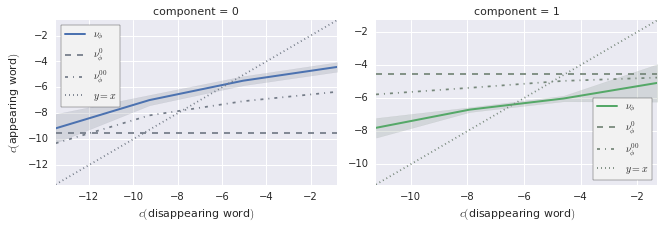

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1311 (cluster-unique) substitutions, but the PCA is in fact computed on 1039 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  ns. global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
   ** global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
   ** global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


  *** global -> global


  *** global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count


   ** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


    * global -> global


    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count


    * global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 764 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.06386448522873689

intercept                      5.488940
global_aoa                     0.011408
global_clustering             -0.063756
global_frequency               0.314143
global_letters_count          -0.000679
global_orthographic_density   -0.095758
global_synonyms_count         -0.092697
dtype: float64

Regressing global frequency with 764 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07888278734647702

intercept                                              12.932701
global_aoa                                             -0.208257
global_clustering                                       1.321946
global_frequency                                        0.349837
global_letters_count                                   -0.961198
global_orthographic_density                            -0.301046
globa

Regressing rel frequency with 764 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.23860908666791103

intercept                  -1.717323
rel_aoa                     0.050168
rel_clustering              0.084282
rel_frequency               0.618688
rel_letters_count          -0.120396
rel_orthographic_density   -0.266593
rel_synonyms_count         -0.051290
dtype: float64

Regressing rel frequency with 764 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.2626408641210872

intercept                                       -1.770070
rel_aoa                                          0.092841
rel_clustering                                   0.151750
rel_frequency                                    0.651110
rel_letters_count                               -0.035463
rel_orthographic_density                        -0.397215
rel_synonyms_count                               0.285190
rel_aoa * rel_clustering                        -0.035604
rel_aoa * rel_frequency             

intercept                                                -21.596016
global_aoa                                                 1.700583
global_clustering                                         -3.086947
global_frequency                                           0.039755
global_letters_count                                      -1.078587
global_orthographic_density                                8.517026
global_synonyms_count                                     13.263576
rel_aoa                                                   -0.620391
rel_clustering                                             6.340745
rel_frequency                                              0.834737
rel_letters_count                                          0.294733
rel_orthographic_density                                  -6.348599
rel_synonyms_count                                       -10.145791
global_aoa * global_clustering                             0.383322
global_aoa * global_frequency                   

Regressing global aoa with 702 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.07199418471972385

intercept                                        6.654969
rel_aoa                                         -0.261909
rel_clustering                                  -0.423385
rel_frequency                                   -0.002442
rel_letters_count                               -0.068379
rel_orthographic_density                        -0.447710
rel_synonyms_count                              -0.096000
rel_aoa * rel_clustering                        -0.134037
rel_aoa * rel_frequency                         -0.075644
rel_aoa * rel_letters_count                      0.058506
rel_aoa * rel_orthographic_density               0.020098
rel_aoa * rel_synonyms_count                     0.085264
rel_clustering * rel_frequency                  -0.043324
rel_clustering * rel_letters_count               0.342218
rel_clustering * rel_orthographic_density        0.022859
rel_clustering * rel_s

Regressing rel aoa with 702 measures, with interactions
           ^^^^^^^
R^2 = 0.2727295140157403

intercept                                                 45.415875
global_aoa                                                -1.396785
global_clustering                                          4.163777
global_frequency                                          -0.070905
global_letters_count                                      -3.740303
global_orthographic_density                              -15.255321
global_synonyms_count                                    -13.148188
rel_aoa                                                    2.457215
rel_clustering                                             0.834543
rel_frequency                                              1.975651
rel_letters_count                                          3.910829
rel_orthographic_density                                  13.647155
rel_synonyms_count                                         2.396434
global_aoa * gl

Regressing global clustering with 607 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.033163522917485366

intercept                                       -5.874513
rel_aoa                                         -0.007130
rel_clustering                                  -0.052851
rel_frequency                                   -0.033577
rel_letters_count                               -0.016396
rel_orthographic_density                         0.050759
rel_synonyms_count                              -0.034835
rel_aoa * rel_clustering                        -0.003246
rel_aoa * rel_frequency                         -0.011366
rel_aoa * rel_letters_count                     -0.013494
rel_aoa * rel_orthographic_density              -0.016021
rel_aoa * rel_synonyms_count                    -0.005327
rel_clustering * rel_frequency                  -0.010156
rel_clustering * rel_letters_count               0.071089
rel_clustering * rel_orthographic_density        0.031520
rel_clu

Regressing rel clustering with 607 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.2970684743635801

intercept                                                 22.459585
global_aoa                                                -0.377562
global_clustering                                          3.715809
global_frequency                                          -1.777195
global_letters_count                                      -0.028506
global_orthographic_density                               -0.552711
global_synonyms_count                                     -2.395249
rel_aoa                                                    0.803425
rel_clustering                                            -3.924445
rel_frequency                                              1.275820
rel_letters_count                                         -0.038088
rel_orthographic_density                                   0.552512
rel_synonyms_count                                        -0.160361
g

Regressing global letters_count with 764 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07758768476991895

intercept                                        5.778664
rel_aoa                                         -0.054680
rel_clustering                                  -0.003456
rel_frequency                                    0.080733
rel_letters_count                                0.251589
rel_orthographic_density                        -0.350158
rel_synonyms_count                              -0.345890
rel_aoa * rel_clustering                         0.050369
rel_aoa * rel_frequency                         -0.006537
rel_aoa * rel_letters_count                     -0.007696
rel_aoa * rel_orthographic_density              -0.013256
rel_aoa * rel_synonyms_count                    -0.082041
rel_clustering * rel_frequency                  -0.054386
rel_clustering * rel_letters_count               0.047550
rel_clustering * rel_orthographic_density        0.045881
re

Regressing rel letters_count with 764 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2700247236607787

intercept                                                 10.220119
global_aoa                                                 1.171135
global_clustering                                         -0.534370
global_frequency                                          -0.231807
global_letters_count                                      -1.897864
global_orthographic_density                               -7.080533
global_synonyms_count                                     -5.067495
rel_aoa                                                   -2.586032
rel_clustering                                            -6.571813
rel_frequency                                              1.095107
rel_letters_count                                          1.963342
rel_orthographic_density                                   1.268203
rel_synonyms_count                                         0.12

Regressing global synonyms_count with 735 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.03957561273765242

intercept                                        0.477939
rel_aoa                                         -0.002337
rel_clustering                                  -0.137343
rel_frequency                                    0.028655
rel_letters_count                               -0.023514
rel_orthographic_density                         0.067137
rel_synonyms_count                               0.218913
rel_aoa * rel_clustering                        -0.005476
rel_aoa * rel_frequency                         -0.005885
rel_aoa * rel_letters_count                     -0.001361
rel_aoa * rel_orthographic_density              -0.001319
rel_aoa * rel_synonyms_count                     0.020417
rel_clustering * rel_frequency                  -0.011012
rel_clustering * rel_letters_count               0.022695
rel_clustering * rel_orthographic_density       -0.023125


Regressing rel synonyms_count with 735 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.2526252498091932

intercept                                                 11.868882
global_aoa                                                -0.334001
global_clustering                                          1.832409
global_frequency                                          -0.766276
global_letters_count                                       0.080026
global_orthographic_density                               -0.442568
global_synonyms_count                                     -0.314967
rel_aoa                                                    0.102694
rel_clustering                                            -1.256825
rel_frequency                                              0.408555
rel_letters_count                                         -0.221776
rel_orthographic_density                                   0.690293
rel_synonyms_count                                        -1.

Regressing global orthographic_density with 616 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.0884162050551478

intercept                                        1.613460
rel_aoa                                          0.094425
rel_clustering                                   0.143336
rel_frequency                                   -0.009736
rel_letters_count                               -0.026913
rel_orthographic_density                         0.324785
rel_synonyms_count                               0.181232
rel_aoa * rel_clustering                         0.060962
rel_aoa * rel_frequency                          0.017527
rel_aoa * rel_letters_count                      0.001980
rel_aoa * rel_orthographic_density               0.056255
rel_aoa * rel_synonyms_count                     0.038296
rel_clustering * rel_frequency                  -0.006238
rel_clustering * rel_letters_count              -0.068022
rel_clustering * rel_orthographic_density      

Regressing rel orthographic_density with 616 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.2431026076862033

intercept                                                -12.363285
global_aoa                                                -0.249221
global_clustering                                         -0.916923
global_frequency                                           0.770367
global_letters_count                                       0.647979
global_orthographic_density                                4.265004
global_synonyms_count                                      5.494445
rel_aoa                                                    0.445610
rel_clustering                                             2.127627
rel_frequency                                             -0.341149
rel_letters_count                                          0.016198
rel_orthographic_density                                  -1.624123
rel_synonyms_count                               